In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import f_oneway, chi2_contingency

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel('salaray_survey_2021.xlsx')

In [3]:
df = dataset.copy()

In [4]:
df.shape

(27946, 18)

In [5]:
df

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,2023-02-27 06:22:35.240,25-34,Computing or Tech,Sr software engineer,NaN,190000,14000.0,USD,NaN,NaN,United States,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American
27942,2023-03-01 09:43:37.098,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,NaN,NaN,United States,Ohio,Brunswick,21 - 30 years,11 - 20 years,NaN,NaN,NaN
27943,2023-03-06 18:16:18.899,25-34,Behavioral Health,Mental Health Therapist,NaN,52416,NaN,USD,NaN,NaN,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White
27944,2023-03-09 09:11:48.506,18-24,Computing or Tech,Help Desk Associate Analyst,NaN,36000,NaN,USD,NaN,NaN,United States,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American


In [6]:
df.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [7]:
new_columns = [
    'timestamp',
    'age_range',
    'industry',
    'job_title',
    'title_detail',
    'annual_salary',
    'compensation',
    'currency',
    'currency_other',
    'salary_detail',
    'country',
    'us_state',
    'city',
    'overall_exp_range',
    'current_exp_range',
    'degree',
    'gender',
    'race'
]
df.columns = new_columns
df.head()

,timestamp,age_range,industry,job_title,title_detail,annual_salary,compensation,currency,currency_other,salary_detail,country,us_state,city,overall_exp_range,current_exp_range,degree,gender,race
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27946 entries, 0 to 27945
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          27946 non-null  datetime64[ns]
 1   age_range          27946 non-null  object        
 2   industry           27874 non-null  object        
 3   job_title          27946 non-null  object        
 4   title_detail       7233 non-null   object        
 5   annual_salary      27946 non-null  int64         
 6   compensation       20690 non-null  float64       
 7   currency           27946 non-null  object        
 8   currency_other     195 non-null    object        
 9   salary_detail      3033 non-null   object        
 10  country            27946 non-null  object        
 11  us_state           22964 non-null  object        
 12  city               27867 non-null  object        
 13  overall_exp_range  27946 non-null  object        
 14  curren

In [9]:
df.describe()

,timestamp,annual_salary,compensation
count,27946,2.794600e+04,2.069000e+04
mean,2021-05-10 22:13:47.491318784,1.472888e+05,1.821073e+04
min,2021-04-27 11:02:09.743000,0.000000e+00,0.000000e+00
25%,2021-04-27 14:19:38.981750016,5.400000e+04,0.000000e+00
50%,2021-04-28 13:51:55.524999936,7.510500e+04,2.000000e+03
75%,2021-04-29 19:01:27.775000064,1.100000e+05,1.000000e+04
max,2023-03-12 14:32:04.060000,8.700000e+08,1.200000e+08
std,NaN,5.418861e+06,8.355831e+05


# DATA CLEANING

In [10]:
df.dtypes

timestamp            datetime64[ns]
age_range                    object
industry                     object
job_title                    object
title_detail                 object
annual_salary                 int64
compensation                float64
currency                     object
currency_other               object
salary_detail                object
country                      object
us_state                     object
city                         object
overall_exp_range            object
current_exp_range            object
degree                       object
gender                       object
race                         object
dtype: object

## Cek Data yg Duplicate

In [11]:
df.duplicated().sum()

0

## Cek Value Setiap Kolom

### age_range

In [12]:
df['age_range'].value_counts().sort_values()

age_range
under 18         11
65 or over       92
55-64           991
18-24          1191
45-54          3176
35-44          9874
25-34         12611
Name: count, dtype: int64

Ubah under 18 menjadi 18 less agar kalau di sorting ascending menurut age_rangenya, 18 bisa terurut, karena mengambil angka depannya walaupun dia string

In [13]:
df['age_range'] = df['age_range'].apply(
    lambda x: '18 less' if x in ('under 18') else x)

In [14]:
df['age_range'].value_counts().sort_values()

age_range
18 less          11
65 or over       92
55-64           991
18-24          1191
45-54          3176
35-44          9874
25-34         12611
Name: count, dtype: int64

### industry

NOTE: terlalu banyak industri ada 1209 industri, harus hapus sebagian (hapus industri ganti jadi other yg jml responden di industri < 100)

Menghitung Jumlah Value yang Unik di kolom industry  
nunique() >> jml nilai unik  
unique() >> nilai unik

In [15]:
df['industry'].nunique()

1209

Menampilkan 30 industri dengan responden terbanyak dari 1209 industry

In [16]:
pd.DataFrame(df['industry'].value_counts().sort_values(ascending=False)).head(30)

,count
industry,
Computing or Tech,4674
Education (Higher Education),2458
Nonprofits,2417
Health care,1888
Government and Public Administration,1882
"Accounting, Banking & Finance",1792
Engineering or Manufacturing,1689
"Marketing, Advertising & PR",1126
Law,1097


### job_title

In [17]:
df['job_title'].nunique()

14292

Dari 14292, dilihat top 30 job_title dgn jml responden terbanyak 

In [18]:
pd.DataFrame(df['job_title'].value_counts().sort_values(ascending=False)).head(30)

,count
job_title,
Software Engineer,286
Project Manager,230
Director,198
Senior Software Engineer,196
Program Manager,152
Librarian,150
Teacher,149
Manager,142
Executive Assistant,136


### title_detail

In [19]:
df['title_detail'].value_counts()

title_detail
Fundraising                                                                                                                                                              20
In commercial real estate industry                                                                                                                                       10
Attorney                                                                                                                                                                  8
Public library                                                                                                                                                            7
Librarian                                                                                                                                                                 7
                                                                                                                               

### annual_salary

In [20]:
df['annual_salary'].value_counts()

annual_salary
60000    584
70000    565
65000    556
80000    553
75000    542
        ... 
81300      1
80300      1
21879      1
42140      1
52416      1
Name: count, Length: 3643, dtype: int64

### compensation

In [21]:
df['compensation'].value_counts()

compensation
0.0        7917
5000.0     1106
10000.0     957
2000.0      772
1000.0      676
           ... 
12400.0       1
5275.0        1
3009.0        1
36500.0       1
9075.0        1
Name: count, Length: 843, dtype: int64

### currency

In [22]:
df['currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

USD: United States Dollar  
CAD: Canadian Dollar  
GBP: British Pound Sterling  
EUR: Euro  
AUD/NZD: Australian Dollar (AUD) or New Zealand Dollar (NZD)  
CHF: Swiss Franc  
SEK: Swedish Krona  
JPY: Japanese Yen  
ZAR: South African Rand  
HKD: Hong Kong Dollar  

In [23]:
df['currency'].value_counts()

currency
USD        23288
CAD         1665
GBP         1585
EUR          637
AUD/NZD      500
Other        156
CHF           37
SEK           37
JPY           23
ZAR           14
HKD            4
Name: count, dtype: int64

### currency_other

NOTE: kolom ini bisa di drop

In [24]:
df['currency_other'].nunique()

113

In [25]:
df['currency_other'].unique()

array([nan, 'INR', 'Peso Argentino', 76302.34,
       'My bonus is based on performance up to 10% of salary',
       'I work for an online state university, managing admissions data. Not direct tech support. ',
       0, 'MYR', 'CHF', 'KWD', 'NOK', 'Na ', 'USD', 'BR$', 'SEK',
       'Base plus Commission ', 'canadian', 'Dkk', 'EUR', 'COP', 'TTD',
       'Indian rupees', 'BRL (R$)', 'Mexican pesos', 'CZK', 'GBP', 'DKK',
       'Bdt', 'RSU / equity', 'ZAR', 'Additonal = Bonus plus stock',
       'American Dollars', 'Php', 'PLN (Polish zloty)',
       'Overtime (about 5 hours a week) and bonus', 'czech crowns',
       'Stock ', 'TRY', 'Norwegian kroner (NOK)', 'CNY', 'ILS/NIS', 55000,
       'AUD & NZD are not the same currency...', 'US Dollar', 'Canadian ',
       'AUD', 'BRL', 'NIS (new Israeli shekel)', '-',
       'RMB (chinese yuan)', 'Taiwanese dollars',
       "AUD and NZD aren't the same currency, and have absolutely nothing to do with each other :(",
       'NZD', 'Philippine Pes

In [26]:
pd.DataFrame(df['currency_other'].value_counts().sort_values(ascending=False)).head(20)

,count
currency_other,
USD,11
NOK,10
INR,10
SGD,9
MYR,8
DKK,8
AUD,7
BRL,6
PLN,5


#### Clean currency_other

In [27]:
df['currency_other'] = df['currency_other'].str.upper()  
df['currency_other'] = df['currency_other'].str.strip()  # hapus ekstra whitespace

# hapus ekstra karakter
df['currency_other'] = df['currency_other'].str.replace(r'[^\w\s]', '')

df = df[df['currency_other'] != '']

In [28]:
df['currency_other'].nunique()

94

In [29]:
df['currency_other'].unique()

array([nan, 'INR', 'PESO ARGENTINO',
       'MY BONUS IS BASED ON PERFORMANCE UP TO 10% OF SALARY',
       'I WORK FOR AN ONLINE STATE UNIVERSITY, MANAGING ADMISSIONS DATA. NOT DIRECT TECH SUPPORT.',
       'MYR', 'CHF', 'KWD', 'NOK', 'NA', 'USD', 'BR$', 'SEK',
       'BASE PLUS COMMISSION', 'CANADIAN', 'DKK', 'EUR', 'COP', 'TTD',
       'INDIAN RUPEES', 'BRL (R$)', 'MEXICAN PESOS', 'CZK', 'GBP', 'BDT',
       'RSU / EQUITY', 'ZAR', 'ADDITONAL = BONUS PLUS STOCK',
       'AMERICAN DOLLARS', 'PHP', 'PLN (POLISH ZLOTY)',
       'OVERTIME (ABOUT 5 HOURS A WEEK) AND BONUS', 'CZECH CROWNS',
       'STOCK', 'TRY', 'NORWEGIAN KRONER (NOK)', 'CNY', 'ILS/NIS',
       'AUD & NZD ARE NOT THE SAME CURRENCY...', 'US DOLLAR', 'AUD',
       'BRL', 'NIS (NEW ISRAELI SHEKEL)', '-', 'RMB (CHINESE YUAN)',
       'TAIWANESE DOLLARS',
       "AUD AND NZD AREN'T THE SAME CURRENCY, AND HAVE ABSOLUTELY NOTHING TO DO WITH EACH OTHER :(",
       'NZD', 'PHILIPPINE PESO', 'SGD', 'KRW (KOREAN WON)', 'THB', 'IDR',

In [30]:
pd.DataFrame(df['currency_other'].value_counts().sort_values(ascending=False)).head(20)

,count
currency_other,
DKK,12
USD,11
SGD,11
NOK,11
INR,10
MYR,8
AUD,7
BRL,6
CZK,5


In [31]:
mapping = {
    'CANADIAN': 'CAD',
    'MEXICAN PESOS': 'MXN'
}

# map currency othernya menjadi sama seperti template pilihan di kolom 'currency'
df['currency_other'] = df['currency_other'].replace(mapping)

mengubah data yang pada kolom 'currency' == Other, dengan nilai currency_valid, jika nilai pada 'currency_other' ada pada currency_valid, (ambil yg value_counts nya di atas 3)

In [32]:
currency_valid = ['USD', 'GBP', 'CAD', 'EUR', 'AUD', 'NZD', 'CHF', 'ZAR', 'SEK', 'HKD', 'JPY', 'NOK', 'INR', 'SGD', 'MYR', 'DKK', 'BRL', 'PLN', 'CZK']
currency_aud_nzd = ['AUD','NZD']

for index, row in df.iterrows():
    if row['currency'] == 'Other' and row['currency_other'] in currency_valid:
        if row['currency_other'] in currency_aud_nzd:
            df.at[index, 'currency'] = 'AUD/NZD'
        else:
            df.at[index, 'currency'] = row['currency_other']

cek value currency lagi apakah other sudah berkurang?

In [33]:
df['currency'].value_counts()

currency
USD        23296
CAD         1666
GBP         1587
EUR          638
AUD/NZD      505
Other         71
CHF           38
SEK           38
JPY           23
ZAR           15
DKK           11
SGD           11
INR           10
NOK            9
MYR            8
BRL            6
CZK            5
PLN            5
HKD            4
Name: count, dtype: int64

### salary_detail

NOTE: kolom ini bisa di drop

In [34]:
df['salary_detail'].value_counts()

salary_detail
Hourly                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         4
RSUs                                                                                                                                                                                                                                                                                                                                                     

### country

In [35]:
df['country'].value_counts()

country
United States              8960
USA                        7916
US                         2606
Canada                     1563
United States               664
                           ... 
U.K. (northern England)       1
U.K                           1
NL                            1
the Netherlands               1
Poland                        1
Name: count, Length: 368, dtype: int64

In [36]:
df['country'].nunique()

368

In [37]:
pd.DataFrame(df['country'].value_counts().sort_values(ascending=False)).head(30)

,count
country,
United States,8960
USA,7916
US,2606
Canada,1563
United States,664
U.S.,578
UK,573
United Kingdom,545
USA,468


#### clean nama country

In [38]:
df['country'] = df['country'].str.lower()  
df['country'] = df['country'].str.strip()  # hapus ekstra whitespace

# hapus ekstra karakter
df['country'] = df['country'].str.replace(r'[^\w\s]', '')

df = df[df['country'] != '']

mapping = {
    'united states': 'USA',
    'us': 'USA',
    'u.s.': 'USA',
    'u.s.a.': 'USA',
    'united kingdom': 'UK',
    'uk': 'UK',
    'u.k.': 'UK',
    'unites states': 'USA',
    'america': 'USA',
    'canada': 'Canada',
    'ireland': 'Ireland',
    'usa': 'USA',
    'the netherlands': 'Netherlands',
    'united states of america': 'USA',
    'u.s>': 'USA',
    'u.s.a': 'USA',
    'u.s': 'USA',
    'united state': 'USA',
    'england': 'UK',
    'united stated': 'USA',
    'the united states': 'USA',
    'u. s.': 'USA',
    'united sates': 'USA',
    'united state of america': 'USA'
}

# map nama countrynya
df['country'] = df['country'].replace(mapping)

In [39]:
df['country'].nunique()

232

In [40]:
df['country'].unique()

array(['USA', 'UK', 'Canada', 'scotland', 'Netherlands', 'australia',
       'spain', 'finland', 'france', 'germany', 'Ireland', 'india', 'isa',
       'argentina', 'great britain', 'denmark', 'netherlands',
       'switzerland', 'bermuda', 'malaysia', 'mexico', 'south africa',
       'belgium', 'northern ireland', 'sweden', 'hong kong', 'kuwait',
       'norway', 'sri lanka', 'contracts', 'usa-- virgin islands',
       'united statws', 'england/uk',
       "we don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so i got a raise because a 3rd party assessment showed i was paid too little for the area we were located",
       'england, uk.', 'greece', 'japan', 'britain', 'austria', 'brazil',
       'canada, ottawa, ontario', 'global', 'united states of american',
       'uniited states', 'united kingdom (england)',
       'worldwide (based in us but short term trips aroudn the world)',
       'canadw', 'hungary', 'luxembourg', 'united sat

In [41]:
pd.DataFrame(df['country'].value_counts().sort_values(ascending=False)).head(30)

,count
country,
USA,23041
Canada,1671
UK,1501
australia,386
germany,193
Ireland,124
new zealand,122
france,67
netherlands,57


### us_state

In [42]:
df['us_state'].value_counts()

us_state
California              2602
New York                2163
Massachusetts           1520
Texas                   1260
Illinois                1209
                        ... 
Illinois, Kentucky         1
Illinois, Wisconsin        1
California, Oklahoma       1
Alabama, Kansas            1
Alabama, Oregon            1
Name: count, Length: 131, dtype: int64

In [43]:
df['us_state'].nunique()

131

### city

In [44]:
df['city'].nunique()

4799

In [45]:
df['city'].value_counts()

city
Boston           771
Chicago          750
New York         710
Seattle          691
London           572
                ... 
Washington dc      1
Redding CA         1
Holmdel, NJ        1
Ethel              1
Diamond bar        1
Name: count, Length: 4799, dtype: int64

### overall_exp_range

In [46]:
df['overall_exp_range'].nunique()

8

In [47]:
df['overall_exp_range'].value_counts()

overall_exp_range
11 - 20 years       9599
8 - 10 years        5368
5-7 years           4861
21 - 30 years       3626
2 - 4 years         2998
31 - 40 years        866
1 year or less       508
41 years or more     120
Name: count, dtype: int64

### current_exp_range

In [48]:
df['current_exp_range'].nunique()

8

In [49]:
df['current_exp_range'].value_counts()

current_exp_range
11 - 20 years       6525
5-7 years           6501
2 - 4 years         6219
8 - 10 years        4962
21 - 30 years       1866
1 year or less      1455
31 - 40 years        380
41 years or more      38
Name: count, dtype: int64

### degree

In [50]:
df['degree'].value_counts()

degree
College degree                        13466
Master's degree                        8836
Some college                           2050
PhD                                    1424
Professional degree (MD, JD, etc.)     1322
High School                             634
Name: count, dtype: int64

In [51]:
df['degree'] = df['degree'].apply(lambda x: 'Professional degree' if str(x) == 'Professional degree (MD, JD, etc.)' else x)

### gender

In [52]:
df['gender'].value_counts()

gender
Woman                            21316
Man                               5429
Non-binary                         742
Other or prefer not to answer      291
Prefer not to answer                 1
Name: count, dtype: int64

### race

In [53]:
df['race'].value_counts()

race
White                                                                                                                            23157
Asian or Asian American                                                                                                           1386
Black or African American                                                                                                          669
Another option not listed here or prefer not to answer                                                                             620
Hispanic, Latino, or Spanish origin                                                                                                595
Hispanic, Latino, or Spanish origin, White                                                                                         383
Asian or Asian American, White                                                                                                     343
Black or African American, White                  

In [54]:
df['race'].nunique()

48

## Cek Missing Value

In [55]:
df.isna().sum()

timestamp                0
age_range                0
industry                72
job_title                0
title_detail         20713
annual_salary            0
compensation          7256
currency                 0
currency_other       27756
salary_detail        24913
country                  0
us_state              4982
city                    79
overall_exp_range        0
current_exp_range        0
degree                 214
gender                 167
race                   169
dtype: int64

In [56]:
df['industry'].fillna('Other Industry', inplace=True)

In [57]:
df['title_detail'].fillna('No Title Detail', inplace=True)

Untuk compensation value yg null diisi 0 karena asumsi tidak semua org mendapatkan compensation, jd yg nilainya null kita anggap 0 (tidak dapat compensation)

In [58]:
df['compensation'].fillna(0 , inplace=True)

nilai currency_other yg null berarti ada dua kemungkinan  
1. Null karena 'currency' != Other
2. Null karena 'currency' == Other and 'currency_other' == null (memang datanya jelek)

In [59]:
df['currency_other'].fillna('No Other Currency', inplace=True)

In [60]:
df['salary_detail'].fillna('No Salary Detail', inplace=True)

field 'us_state' hanya diisi oleh responden yg country == US or USA, jd yang tidak mengisi field us_state kita asumsikan dia bukan berasal dar US

In [61]:
df['us_state'].fillna('Non US', inplace=True)

In [62]:
df['city'].fillna('Other City', inplace=True)

In [63]:
df['degree'].fillna('Other Degree', inplace=True)

In [64]:
df['gender'].fillna('Other Gender', inplace=True)

In [65]:
df['race'].fillna('Other Race', inplace=True)

In [66]:
df.isna().sum()

timestamp            0
age_range            0
industry             0
job_title            0
title_detail         0
annual_salary        0
compensation         0
currency             0
currency_other       0
salary_detail        0
country              0
us_state             0
city                 0
overall_exp_range    0
current_exp_range    0
degree               0
gender               0
race                 0
dtype: int64

## Feature Engineering

In [67]:
df

,timestamp,age_range,industry,job_title,title_detail,annual_salary,compensation,currency,currency_other,salary_detail,country,us_state,city,overall_exp_range,current_exp_range,degree,gender,race
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,No Title Detail,55000,0.0,USD,No Other Currency,No Salary Detail,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,No Title Detail,54600,4000.0,GBP,No Other Currency,No Salary Detail,UK,Non US,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,No Title Detail,34000,0.0,USD,No Other Currency,No Salary Detail,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,No Title Detail,62000,3000.0,USD,No Other Currency,No Salary Detail,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,No Title Detail,60000,7000.0,USD,No Other Currency,No Salary Detail,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,2023-02-27 06:22:35.240,25-34,Computing or Tech,Sr software engineer,No Title Detail,190000,14000.0,USD,No Other Currency,No Salary Detail,USA,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American
27942,2023-03-01 09:43:37.098,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,No Other Currency,No Salary Detail,USA,Ohio,Brunswick,21 - 30 years,11 - 20 years,Other Degree,Other Gender,Other Race
27943,2023-03-06 18:16:18.899,25-34,Behavioral Health,Mental Health Therapist,No Title Detail,52416,0.0,USD,No Other Currency,No Salary Detail,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White
27944,2023-03-09 09:11:48.506,18-24,Computing or Tech,Help Desk Associate Analyst,No Title Detail,36000,0.0,USD,No Other Currency,No Salary Detail,USA,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American


### Ubah industry dengan jumlah responden < 100 menjadi 'Other Industry'

In [68]:
industry_count = df['industry'].value_counts()
industries_under_100 = industry_count[industry_count < 100]
industries_under_100

industry
Leisure, Sport & Tourism    98
Other Industry              72
Publishing                  56
Library                     51
Libraries                   50
                            ..
medical research             1
restoration                  1
IT MSP                       1
public libraries             1
Fast food                    1
Name: count, Length: 1186, dtype: int64

In [69]:
df['industry'] = df['industry'].apply(
    lambda x: 'Other Industry' if x in industries_under_100 else x)

In [70]:
df['industry'].value_counts()

industry
Computing or Tech                       4674
Education (Higher Education)            2458
Nonprofits                              2417
Other Industry                          2372
Health care                             1888
Government and Public Administration    1882
Accounting, Banking & Finance           1792
Engineering or Manufacturing            1689
Marketing, Advertising & PR             1126
Law                                     1097
Business or Consulting                   849
Education (Primary/Secondary)            832
Media & Digital                          772
Insurance                                530
Retail                                   502
Recruitment or HR                        459
Property or Construction                 386
Utilities & Telecommunications           357
Art & Design                             355
Transport or Logistics                   303
Sales                                    285
Social Work                              273
H

### Ubah yg bukan Man or Woman menjadi Other Gender

In [71]:
df['gender'] = df['gender'].apply(
    lambda x: 'Other Gender' if x not in ('Man', 'Woman') else x)

In [72]:
df['gender'].value_counts()

gender
Woman           21316
Man              5429
Other Gender     1201
Name: count, dtype: int64

### Ubah yg jml currency_other < 4 menjadi Other

In [73]:
currency_other_count = df['currency_other'].value_counts()
currency_other_under4 = currency_other_count[currency_other_count < 4]
currency_other_under4

currency_other
ILS                       3
PHP                       2
ARS                       2
KRW                       2
NTD                       2
                         ..
ILS/NIS                   1
NORWEGIAN KRONER (NOK)    1
STOCK                     1
CZECH CROWNS              1
NGN                       1
Name: count, Length: 79, dtype: int64

In [74]:
df['currency_other'] = df['currency_other'].apply(
    lambda x: 'Other Currency' if x in currency_other_under4 else x)

In [75]:
df['currency_other'].value_counts()

currency_other
No Other Currency    27756
Other Currency          92
DKK                     12
NOK                     11
USD                     11
SGD                     11
INR                     10
MYR                      8
AUD                      7
BRL                      6
CZK                      5
PLN                      5
CAD                      4
MXN                      4
NZD                      4
Name: count, dtype: int64

### Ubah yg jml countrynya < 10 menjadi Other Country

In [76]:
country_count = df['country'].value_counts()
countries_under10 = country_count[country_count < 10]
countries_under10

country
philippines                                              8
china                                                    7
mexico                                                   7
nz                                                       6
thailand                                                 6
                                                        ..
canad                                                    1
cambodia                                                 1
eritrea                                                  1
for the united states government, but posted overseas    1
bosnia and herzegovina                                   1
Name: count, Length: 204, dtype: int64

In [77]:
df['country'] = df['country'].apply(
    lambda x: 'Other Country' if x in countries_under10 else x)

In [78]:
def capitalize_country(country):
    if country.lower() in ['usa', 'uk']:
        return country.upper() 
    else:
        return country.capitalize()

df['country'] = df['country'].apply(capitalize_country)

In [79]:
pd.DataFrame(df['country'].value_counts().sort_values(ascending=False)).head(30)

,count
country,
USA,23041
Canada,1671
UK,1501
Australia,386
Other country,331
Germany,193
Ireland,124
New zealand,122
Netherlands,88


## Convert currency lain selain USD menjadi USD

In [80]:
df['currency'].value_counts()

currency
USD        23296
CAD         1666
GBP         1587
EUR          638
AUD/NZD      505
Other         71
CHF           38
SEK           38
JPY           23
ZAR           15
DKK           11
SGD           11
INR           10
NOK            9
MYR            8
BRL            6
CZK            5
PLN            5
HKD            4
Name: count, dtype: int64

USD (United States Dollar)  
CAD = 0.73 (Canadian Dollar)  
GBP = 1.26 (British Pound Sterling)  
EUR = 1.07 (Euro)  
AUD/NZD = 0.65 (Australian Dollar or New Zealand Dollar)  
Other: bisa drop saja  
CHF = 1.11 (Swiss Franc)  
SEK = 0.092 (Swedish Krona)  
JPY = 0.0063 (Japanese Yen)  
ZAR = 0.053 (South African Rand)  
INR = 0.012 (Indian Rupee)  
DKK = 0.14 (Danish Krone)  
SGD = 0.73 (Singapore Dollar)  
MYR = 0.20938 (Malaysian Ringgit)  
NOK = 0.091 (Norwegian Krone)  
BRL = 0.19 (Brazilian Real)  
PLN = 0.25 (Polish Złoty)  
HKD = 0.13 (Hong Kong Dollar)  
CZK = 0.043 (Czech Koruna)  

In [81]:
USD = 1 
CAD = 0.73
GBP = 1.26
EUR = 1.07
AUD_NZD = 0.65
CHF = 1.11
SEK = 0.092 
JPY = 0.0063
ZAR = 0.053 
INR = 0.012
DKK = 0.14
SGD = 0.73 
MYR = 0.20938
NOK = 0.091
BRL = 0.19
PLN = 0.25
HKD = 0.13
CZK = 0.043 

for index, row in df.iterrows():
    if row['currency'] == 'USD':
        df.at[index, 'currency'] = 'USD'
    elif row['currency'] != 'USD' and row['currency'] != 'Other':
        if row['currency'] == 'CAD':
            convert_usd_annual_salary = row['annual_salary'] * CAD
            comver_usd_compensation = row['compensation'] * CAD
        elif row['currency'] == 'GBP':
            convert_usd_annual_salary = row['annual_salary'] * GBP
            comver_usd_compensation = row['compensation'] * GBP
        elif row['currency'] == 'EUR':
            convert_usd_annual_salary = row['annual_salary'] * EUR
            comver_usd_compensation = row['compensation'] * EUR
        elif row['currency'] == 'AUD/NZD':
            convert_usd_annual_salary = row['annual_salary'] * AUD_NZD
            comver_usd_compensation = row['compensation'] * AUD_NZD
        elif row['currency'] == 'CHF':
            convert_usd_annual_salary = row['annual_salary'] * CHF
            comver_usd_compensation = row['compensation'] * CHF
        elif row['currency'] == 'SEK':
            convert_usd_annual_salary = row['annual_salary'] * SEK
            comver_usd_compensation = row['compensation'] * SEK
        elif row['currency'] == 'JPY':
            convert_usd_annual_salary = row['annual_salary'] * JPY
            comver_usd_compensation = row['compensation'] * JPY
        elif row['currency'] == 'ZAR':
            convert_usd_annual_salary = row['annual_salary'] * ZAR
            comver_usd_compensation = row['compensation'] * ZAR
        elif row['currency'] == 'INR':
            convert_usd_annual_salary = row['annual_salary'] * INR
            comver_usd_compensation = row['compensation'] * INR
        elif row['currency'] == 'DKK':
            convert_usd_annual_salary = row['annual_salary'] * DKK
            comver_usd_compensation = row['compensation'] * DKK
        elif row['currency'] == 'SGD':
            convert_usd_annual_salary = row['annual_salary'] * SGD
            comver_usd_compensation = row['compensation'] * SGD
        elif row['currency'] == 'MYR':
            convert_usd_annual_salary = row['annual_salary'] * MYR
            comver_usd_compensation = row['compensation'] * MYR
        elif row['currency'] == 'NOK':
            convert_usd_annual_salary = row['annual_salary'] * NOK
            comver_usd_compensation = row['compensation'] * NOK
        elif row['currency'] == 'BRL':
            convert_usd_annual_salary = row['annual_salary'] * BRL
            comver_usd_compensation = row['compensation'] * BRL
        elif row['currency'] == 'PLN':
            convert_usd_annual_salary = row['annual_salary'] * PLN
            comver_usd_compensation = row['compensation'] * PLN
        elif row['currency'] == 'HKD':
            convert_usd_annual_salary = row['annual_salary'] * HKD
            comver_usd_compensation = row['compensation'] * HKD
        elif row['currency'] == 'CZK':
            convert_usd_annual_salary = row['annual_salary'] * CZK
            comver_usd_compensation = row['compensation'] * CZK
        df.at[index, 'currency'] = 'USD'
    else:
        df.at[index, 'currency'] = 'Other'

In [82]:
df

,timestamp,age_range,industry,job_title,title_detail,annual_salary,compensation,currency,currency_other,salary_detail,country,us_state,city,overall_exp_range,current_exp_range,degree,gender,race
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,No Title Detail,55000,0.0,USD,No Other Currency,No Salary Detail,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,No Title Detail,54600,4000.0,USD,No Other Currency,No Salary Detail,UK,Non US,Cambridge,8 - 10 years,5-7 years,College degree,Other Gender,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,No Title Detail,34000,0.0,USD,No Other Currency,No Salary Detail,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,No Title Detail,62000,3000.0,USD,No Other Currency,No Salary Detail,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,No Title Detail,60000,7000.0,USD,No Other Currency,No Salary Detail,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,2023-02-27 06:22:35.240,25-34,Computing or Tech,Sr software engineer,No Title Detail,190000,14000.0,USD,No Other Currency,No Salary Detail,USA,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American
27942,2023-03-01 09:43:37.098,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,No Other Currency,No Salary Detail,USA,Ohio,Brunswick,21 - 30 years,11 - 20 years,Other Degree,Other Gender,Other Race
27943,2023-03-06 18:16:18.899,25-34,Other Industry,Mental Health Therapist,No Title Detail,52416,0.0,USD,No Other Currency,No Salary Detail,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White
27944,2023-03-09 09:11:48.506,18-24,Computing or Tech,Help Desk Associate Analyst,No Title Detail,36000,0.0,USD,No Other Currency,No Salary Detail,USA,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American


In [83]:
df['currency'].value_counts()

currency
USD      27875
Other       71
Name: count, dtype: int64

## Feature Engineering Part 2

### Gabungkan annual_salary dan compensation menjadi total_income

In [84]:
df['total_income'] = df['annual_salary'] + df['compensation']

In [85]:
df['total_income'].dtypes

dtype('float64')

In [86]:
df

,timestamp,age_range,industry,job_title,title_detail,annual_salary,compensation,currency,currency_other,salary_detail,country,us_state,city,overall_exp_range,current_exp_range,degree,gender,race,total_income
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,No Title Detail,55000,0.0,USD,No Other Currency,No Salary Detail,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,No Title Detail,54600,4000.0,USD,No Other Currency,No Salary Detail,UK,Non US,Cambridge,8 - 10 years,5-7 years,College degree,Other Gender,White,58600.0
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,No Title Detail,34000,0.0,USD,No Other Currency,No Salary Detail,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,No Title Detail,62000,3000.0,USD,No Other Currency,No Salary Detail,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,65000.0
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,No Title Detail,60000,7000.0,USD,No Other Currency,No Salary Detail,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,2023-02-27 06:22:35.240,25-34,Computing or Tech,Sr software engineer,No Title Detail,190000,14000.0,USD,No Other Currency,No Salary Detail,USA,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American,204000.0
27942,2023-03-01 09:43:37.098,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,No Other Currency,No Salary Detail,USA,Ohio,Brunswick,21 - 30 years,11 - 20 years,Other Degree,Other Gender,Other Race,68000.0
27943,2023-03-06 18:16:18.899,25-34,Other Industry,Mental Health Therapist,No Title Detail,52416,0.0,USD,No Other Currency,No Salary Detail,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White,52416.0
27944,2023-03-09 09:11:48.506,18-24,Computing or Tech,Help Desk Associate Analyst,No Title Detail,36000,0.0,USD,No Other Currency,No Salary Detail,USA,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American,36000.0


Hanya pakai data yg total_income currency nya USD

In [87]:
df = df[df['currency'] != 'Other']

Untuk mengetahaui apakah responden punya pengalaman lain selain di field saat ini  
karena 'overall_exp_range' dan 'current_exp_range' bertipe data string, oleh karena itu perlu di encode ke numeric agar bisa dikurangi untuk mengetahui selisihnya

In [88]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# convert exp range string ke numerical
df.loc[:,'overall_exp_range_encoded'] = label_encoder.fit_transform(df['overall_exp_range'])
df.loc[:,'current_exp_range_encoded'] = label_encoder.transform(df['current_exp_range'])

# hitung perbedaan antara overall_exp_range_encoded dan current_exp_range_encoded
df.loc[:,'non_field_exp_range'] = df['overall_exp_range_encoded'] - df['current_exp_range_encoded']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8900\3450852775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'overall_exp_range_encoded'] = label_encoder.fit_transform(df['overall_exp_range'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8900\3450852775.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'current_exp_range_encoded'] = label_encoder.transform(df['current_exp_range'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8900\3450852775.py:9: SettingWithCopyWarning: 
A value is t

In [89]:
df

,timestamp,age_range,industry,job_title,title_detail,annual_salary,compensation,currency,currency_other,salary_detail,...,city,overall_exp_range,current_exp_range,degree,gender,race,total_income,overall_exp_range_encoded,current_exp_range_encoded,non_field_exp_range
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,No Title Detail,55000,0.0,USD,No Other Currency,No Salary Detail,...,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0,6,6,0
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,No Title Detail,54600,4000.0,USD,No Other Currency,No Salary Detail,...,Cambridge,8 - 10 years,5-7 years,College degree,Other Gender,White,58600.0,7,6,1
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,No Title Detail,34000,0.0,USD,No Other Currency,No Salary Detail,...,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0,2,2,0
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,No Title Detail,62000,3000.0,USD,No Other Currency,No Salary Detail,...,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,65000.0,7,6,1
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,No Title Detail,60000,7000.0,USD,No Other Currency,No Salary Detail,...,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,67000.0,7,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,2023-02-27 06:22:35.240,25-34,Computing or Tech,Sr software engineer,No Title Detail,190000,14000.0,USD,No Other Currency,No Salary Detail,...,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American,204000.0,6,6,0
27942,2023-03-01 09:43:37.098,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,No Other Currency,No Salary Detail,...,Brunswick,21 - 30 years,11 - 20 years,Other Degree,Other Gender,Other Race,68000.0,3,1,2
27943,2023-03-06 18:16:18.899,25-34,Other Industry,Mental Health Therapist,No Title Detail,52416,0.0,USD,No Other Currency,No Salary Detail,...,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White,52416.0,2,2,0
27944,2023-03-09 09:11:48.506,18-24,Computing or Tech,Help Desk Associate Analyst,No Title Detail,36000,0.0,USD,No Other Currency,No Salary Detail,...,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American,36000.0,6,2,4


Mengubah value pada kolom 'non_field_exp_range' menjadi value biner  
1 artinya responden memiliki pengalaman lebih selain di field ini (semua pengalaman - pengalaman kerja di bidang saat ini != 0)  
0 artinya responden tidak memiliki pengalaman lebih selain di field ini (semua pengalaman - pengalaman kerja di bidang saat ini == 0)

In [90]:
df.loc[:, 'non_field_exp_range'] = df['non_field_exp_range'].apply(lambda x: 1 if x != 0 else x)

In [91]:
map_non_field={
    1: 'Pengalaman Lebih Selain Bidang Sekarang',
    0: 'Tidak Ada Pengalaman Lebih'
}

df.loc[:,'non_field_exp_range'] = df['non_field_exp_range'].replace(map_non_field)

In [92]:
df

,timestamp,age_range,industry,job_title,title_detail,annual_salary,compensation,currency,currency_other,salary_detail,...,city,overall_exp_range,current_exp_range,degree,gender,race,total_income,overall_exp_range_encoded,current_exp_range_encoded,non_field_exp_range
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,No Title Detail,55000,0.0,USD,No Other Currency,No Salary Detail,...,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0,6,6,Tidak Ada Pengalaman Lebih
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,No Title Detail,54600,4000.0,USD,No Other Currency,No Salary Detail,...,Cambridge,8 - 10 years,5-7 years,College degree,Other Gender,White,58600.0,7,6,Pengalaman Lebih Selain Bidang Sekarang
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,No Title Detail,34000,0.0,USD,No Other Currency,No Salary Detail,...,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0,2,2,Tidak Ada Pengalaman Lebih
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,No Title Detail,62000,3000.0,USD,No Other Currency,No Salary Detail,...,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,65000.0,7,6,Pengalaman Lebih Selain Bidang Sekarang
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,No Title Detail,60000,7000.0,USD,No Other Currency,No Salary Detail,...,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,67000.0,7,6,Pengalaman Lebih Selain Bidang Sekarang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,2023-02-27 06:22:35.240,25-34,Computing or Tech,Sr software engineer,No Title Detail,190000,14000.0,USD,No Other Currency,No Salary Detail,...,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American,204000.0,6,6,Tidak Ada Pengalaman Lebih
27942,2023-03-01 09:43:37.098,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,No Other Currency,No Salary Detail,...,Brunswick,21 - 30 years,11 - 20 years,Other Degree,Other Gender,Other Race,68000.0,3,1,Pengalaman Lebih Selain Bidang Sekarang
27943,2023-03-06 18:16:18.899,25-34,Other Industry,Mental Health Therapist,No Title Detail,52416,0.0,USD,No Other Currency,No Salary Detail,...,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White,52416.0,2,2,Tidak Ada Pengalaman Lebih
27944,2023-03-09 09:11:48.506,18-24,Computing or Tech,Help Desk Associate Analyst,No Title Detail,36000,0.0,USD,No Other Currency,No Salary Detail,...,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American,36000.0,6,2,Pengalaman Lebih Selain Bidang Sekarang


### Drop columns yang tidak perlu 

In [93]:
deleted_columns = [
    'timestamp',
    'title_detail',
    'currency',
    'currency_other',
    'salary_detail',
    'us_state',
    'city',
    'overall_exp_range',
    'overall_exp_range_encoded',
    'current_exp_range_encoded'
]
new_df = df.drop(columns=deleted_columns)

In [94]:
new_order = [
    'age_range',
    'industry',
    'job_title',
    'annual_salary',
    'compensation',
    'total_income',
    'current_exp_range',
    'non_field_exp_range',
    'degree',
    'gender',
    'race',
    'country',
]

new_df = new_df.reindex(columns=new_order)

In [95]:
new_df

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0.0,55000.0,5-7 years,Tidak Ada Pengalaman Lebih,Master's degree,Woman,White,USA
1,25-34,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,58600.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Other Gender,White,UK
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,0.0,34000.0,2 - 4 years,Tidak Ada Pengalaman Lebih,College degree,Woman,White,USA
3,25-34,Nonprofits,Program Manager,62000,3000.0,65000.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Woman,White,USA
4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,67000.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Woman,White,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
27941,25-34,Computing or Tech,Sr software engineer,190000,14000.0,204000.0,5-7 years,Tidak Ada Pengalaman Lebih,College degree,Man,Asian or Asian American,USA
27942,45-54,Property or Construction,Property Manager,55000,13000.0,68000.0,11 - 20 years,Pengalaman Lebih Selain Bidang Sekarang,Other Degree,Other Gender,Other Race,USA
27943,25-34,Other Industry,Mental Health Therapist,52416,0.0,52416.0,2 - 4 years,Tidak Ada Pengalaman Lebih,Master's degree,Woman,White,USA
27944,18-24,Computing or Tech,Help Desk Associate Analyst,36000,0.0,36000.0,2 - 4 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Man,Black or African American,USA


In [96]:
new_df.describe()

,annual_salary,compensation,total_income
count,2.787500e+04,2.787500e+04,2.787500e+04
mean,9.939120e+04,9.073327e+03,1.084645e+05
std,6.502547e+05,4.155156e+04,6.553748e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.400000e+04,0.000000e+00,5.500000e+04
50%,7.500000e+04,0.000000e+00,7.900000e+04
75%,1.090000e+05,5.000000e+03,1.150000e+05
max,1.020000e+08,2.000000e+06,1.020000e+08


In [97]:
income_summary = new_df['total_income'].describe()

min_income = income_summary['min']
max_income = income_summary['max']

print("Minimum Total Income:", min_income)
print("Maximum Total Income:", max_income)

Minimum Total Income: 0.0
Maximum Total Income: 102000000.0


Dataframe 'df' di cek tidak ada duplicate tapi pada dataframe 'new_df' terdeteksi ada duplicate, hal ini bisa disebabkan karena kolom timestamp di hapus, dengan asumsi orang yang sama input survey dengan data yg sama tapi dalam waktu yg berbeda

In [98]:
new_df.duplicated().sum()

182

menghapus row yg duplicate

In [99]:
new_df.drop_duplicates(inplace=True)

## Cek Apakah Ada row yang Anomali?

In [100]:
new_df[new_df['age_range'] == '18 less']

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
2462,18 less,Education (Primary/Secondary),Teacher,45000,1200.0,46200.0,2 - 4 years,Pengalaman Lebih Selain Bidang Sekarang,Master's degree,Woman,White,USA
4373,18 less,Health care,Undergraduate Research Assistant,17000,0.0,17000.0,2 - 4 years,Tidak Ada Pengalaman Lebih,Some college,Other Gender,White,USA
8418,18 less,Retail,Walmart cashier,32552,0.0,32552.0,2 - 4 years,Tidak Ada Pengalaman Lebih,High School,Other Gender,White,Canada
8987,18 less,Health care,Intern,29120,0.0,29120.0,2 - 4 years,Tidak Ada Pengalaman Lebih,High School,Woman,Asian or Asian American,USA
10762,18 less,Nonprofits,Finance Director,118000,0.0,118000.0,11 - 20 years,Pengalaman Lebih Selain Bidang Sekarang,Master's degree,Woman,White,USA
12086,18 less,Health care,Doctor,220000,5000.0,225000.0,1 year or less,Pengalaman Lebih Selain Bidang Sekarang,PhD,Other Gender,Asian or Asian American,USA
16281,18 less,Other Industry,"Lifeguard, Swim Instructor",34320,0.0,34320.0,1 year or less,Tidak Ada Pengalaman Lebih,Other Degree,Woman,White,USA
23391,18 less,Other Industry,Head Lifegaurd,31200,0.0,31200.0,2 - 4 years,Tidak Ada Pengalaman Lebih,High School,Woman,White,USA
25183,18 less,Law,Records manager,106000,3200.0,109200.0,1 year or less,Pengalaman Lebih Selain Bidang Sekarang,Master's degree,Woman,White,USA
25734,18 less,Retail,Technology Manager,100200,12000.0,112200.0,21 - 30 years,Tidak Ada Pengalaman Lebih,Some college,Woman,"Hispanic, Latino, or Spanish origin",USA


### Anomali Data Detected #1

Responden yang umurnya di bawah 18 Tahun dan memiliki gelar selain highschool dianggap anomali

index anomali  
2462, 4373, 10762, 12086, 25183, 25734  

Penejelasan  
2462, karena master's degree di umur kurang dari 18 tahun  
4373, karena some college degree di umur kurang dari 18 tahun  
10762, karena master's degree di umur kurang dari 18 tahun  
12086, karena PhD degree di umur kurang dari 18 tahun  
25183, karena master's degree di umur kurang dari 18 tahun  
25734, karena some college degree di umur kurang dari 18 tahun dan current experience range nya lebih besar daripada umurnya  

In [101]:
new_df[new_df['total_income'] == 0]

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
8739,35-44,Other Industry,"""mum"" ;)",0,0.0,0.0,8 - 10 years,Pengalaman Lebih Selain Bidang Sekarang,Master's degree,Woman,White,USA
10362,35-44,Nonprofits,Executive Director,0,0.0,0.0,11 - 20 years,Tidak Ada Pengalaman Lebih,Master's degree,Other Gender,White,USA
13537,25-34,Education (Primary/Secondary),Student teacher,0,0.0,0.0,2 - 4 years,Tidak Ada Pengalaman Lebih,Master's degree,Woman,"Middle Eastern or Northern African, White",USA
15238,18-24,Computing or Tech,Product Marketer,0,0.0,0.0,1 year or less,Tidak Ada Pengalaman Lebih,College degree,Man,Asian or Asian American,USA
15334,45-54,Education (Primary/Secondary),Househusband,0,0.0,0.0,5-7 years,Tidak Ada Pengalaman Lebih,PhD,Man,White,USA
20208,45-54,Computing or Tech,Founder,0,0.0,0.0,21 - 30 years,Tidak Ada Pengalaman Lebih,Some college,Woman,White,USA
20470,35-44,"Marketing, Advertising & PR",Unemployed,0,0.0,0.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,Master's degree,Man,White,USA
23028,25-34,Nonprofits,Government Relations Director,0,0.0,0.0,2 - 4 years,Pengalaman Lebih Selain Bidang Sekarang,Master's degree,Woman,White,USA
26562,18 less,"Accounting, Banking & Finance",na,0,0.0,0.0,1 year or less,Tidak Ada Pengalaman Lebih,High School,Man,Asian or Asian American,Other country
26748,18-24,Other Industry,College Senior,0,0.0,0.0,1 year or less,Pengalaman Lebih Selain Bidang Sekarang,Some college,Man,White,USA


### Anomali Data Detected #2

Melihat anomali dari jon_title nya

index anomali  
8739, 15334, 20470, 26562, 26748, 27760, 27829  

8739, perkerjaanya sebagai ibu  
15334, pekerjaanya sebagai bapak rumah tangga  
20470, pekerjaanya belum kerja 'unemployed'  
26562, pekerjaan tidak jelas, tidak ada job_title, gaji 0, umur di bawah 18 tahun, dan masih sekolah  
26748, pekerjaan 'college senior'  
27760, pekerjaanya sebagai pelajar  
27829, pekerjaanya ibu rumah tangga  

In [102]:
new_df.query('total_income > 0 & total_income < 100')

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
97,55-64,Other Industry,Quality Assurance Lead,58,0.0,58.0,8 - 10 years,Pengalaman Lebih Selain Bidang Sekarang,Master's degree,Woman,White,USA
166,25-34,Health care,occupational therapist,35,0.0,35.0,2 - 4 years,Tidak Ada Pengalaman Lebih,College degree,Woman,White,Finland
895,45-54,Education (Primary/Secondary),Special Education Teacher,38,0.0,38.0,11 - 20 years,Pengalaman Lebih Selain Bidang Sekarang,Master's degree,Woman,White,USA
968,25-34,Media & Digital,Managing Editor,61,0.0,61.0,5-7 years,Tidak Ada Pengalaman Lebih,College degree,Woman,White,USA
2229,25-34,"Marketing, Advertising & PR",Project Manager / Account Manager,33,0.0,33.0,2 - 4 years,Pengalaman Lebih Selain Bidang Sekarang,Master's degree,Woman,White,Germany
4081,45-54,Retail,Operations Manager,35,0.0,35.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,Some college,Woman,White,USA
4546,35-44,Computing or Tech,Senior Developer / Consultant,63,10.0,73.0,8 - 10 years,Tidak Ada Pengalaman Lebih,Some college,Man,White,Germany
5211,25-34,Other Industry,Assistant Registrar,40,0.0,40.0,2 - 4 years,Tidak Ada Pengalaman Lebih,Master's degree,Woman,White,USA
5879,25-34,Computing or Tech,Programmer,18,0.0,18.0,1 year or less,Tidak Ada Pengalaman Lebih,Other Degree,Man,White,Netherlands
6124,45-54,Other Industry,Regional Manager,70,0.0,70.0,11 - 20 years,Pengalaman Lebih Selain Bidang Sekarang,Master's degree,Woman,White,USA


ternyata banyak sekali data yang anomali, kenapa? karena responden denga job_title manager atau chief executive gaji pertahunnya di bawah $100 USD, yg artinya gajinya pertahun 1.600.000 rupiah, sangat tidak masuk akal.  

asumsi bahwa responden yang input tidak teliti, mungkin responden mengira satuannya K atau yg lainnya  
jadi untuk mengatasi masalah ini kami akan menggunakan minimal gaji tahunan di USA untuk menjadi acuanya, jadi jika nilai total_income row tersebut di bawah nilai minimun gaji tahunan USA akan di drop, termasuk industri Nonprofits

kenapa jika 'industry' == 'Nonprofits' dan 'total_income' < gaji tahunan minimum USA di drop?  
karena saat ini kita akan mencari prediksi gaji menggunakan metode linear regression, sementara itu responden yang bekerja di bidang Nonporfits polanya sangat tidak bisa di tebak ada organisasi yg memberikan gaji dan ada yang tidak memberikan gaji, jadi saat ini kami asumsikan kami akan menggunakan data dari industry Nonprofits yang memberikan gaji dan gaji tahunannya di atas atau sama dengan gaji tahunan minimum di Amerika

SUMBER ACUAN GAJI TAHUNAN MINIMUM DI USA  
kenapa pakai acuannya di USA? Karena sebagain besar responden 'country' dari USA 

gaji perjam $7.25  
full time work = 40 hours a week and 52 weeks a year  
maka gaji tahunan  


$Gaji Pertahun=7.25×40×52$      
$Gaji Pertahun=7.25×40×52=15,080$  

Minimum wage is the lowest amount of compensation (read: money) that an employer can legally pay you to work for them. Currently, under the Fair Labor Standards Act (FLSA), employers are required to pay 7.25 USD an hour by federal law, which comes out to about  $15,080 a year for full-time workers.  

sumber: US DEPARTMENT OF LABOR  
https://www.dol.gov/general/topic/wages/minimumwage

Datafram new_df hanya mengambil row yang total_incomenya lebih atau sama dengan 15080

In [103]:
new_df = new_df[new_df['total_income'] >= 15080]

Jangan pakai row yang anomali di new_df

In [104]:
value_anomali = [2462, 4373, 10762, 12086, 25183, 25734]

In [105]:
new_df = new_df[new_df.index.isin(value_anomali) == False]

In [106]:
new_df[new_df['age_range'] == '18 less']

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
8418,18 less,Retail,Walmart cashier,32552,0.0,32552.0,2 - 4 years,Tidak Ada Pengalaman Lebih,High School,Other Gender,White,Canada
8987,18 less,Health care,Intern,29120,0.0,29120.0,2 - 4 years,Tidak Ada Pengalaman Lebih,High School,Woman,Asian or Asian American,USA
16281,18 less,Other Industry,"Lifeguard, Swim Instructor",34320,0.0,34320.0,1 year or less,Tidak Ada Pengalaman Lebih,Other Degree,Woman,White,USA
23391,18 less,Other Industry,Head Lifegaurd,31200,0.0,31200.0,2 - 4 years,Tidak Ada Pengalaman Lebih,High School,Woman,White,USA


In [107]:
new_df.describe()

,annual_salary,compensation,total_income
count,2.751100e+04,2.751100e+04,2.751100e+04
mean,1.000540e+05,9.047692e+03,1.091017e+05
std,6.544878e+05,4.027177e+04,6.595204e+05
min,0.000000e+00,0.000000e+00,1.508000e+04
25%,5.477250e+04,0.000000e+00,5.580000e+04
50%,7.600000e+04,0.000000e+00,7.950000e+04
75%,1.100000e+05,5.200000e+03,1.160000e+05
max,1.020000e+08,2.000000e+06,1.020000e+08


## Cek Outlier

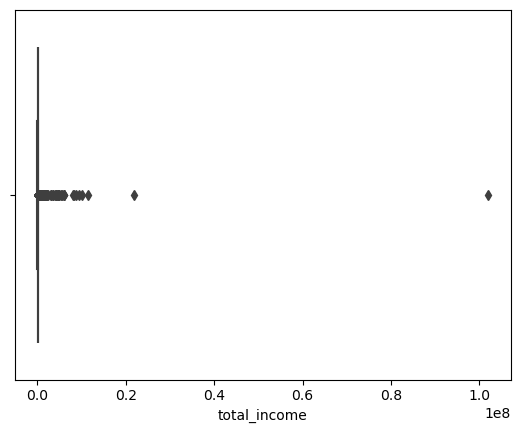

In [108]:
sns.boxplot(data = new_df, x='total_income')
plt.show()

### Mneggunakan metode Zscore untuk menghapus Outlier  

![Rumus Zscore](img/zscore3_rumus.jpeg)

In [109]:
new_df['zscore'] = (new_df['total_income'] - new_df['total_income'].mean())/new_df['total_income'].std()

In [110]:
new_df

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country,zscore
0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0.0,55000.0,5-7 years,Tidak Ada Pengalaman Lebih,Master's degree,Woman,White,USA,-0.082032
1,25-34,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,58600.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Other Gender,White,UK,-0.076573
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,0.0,34000.0,2 - 4 years,Tidak Ada Pengalaman Lebih,College degree,Woman,White,USA,-0.113873
3,25-34,Nonprofits,Program Manager,62000,3000.0,65000.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Woman,White,USA,-0.066869
4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,67000.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Woman,White,USA,-0.063837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,25-34,Computing or Tech,Sr software engineer,190000,14000.0,204000.0,5-7 years,Tidak Ada Pengalaman Lebih,College degree,Man,Asian or Asian American,USA,0.143890
27942,45-54,Property or Construction,Property Manager,55000,13000.0,68000.0,11 - 20 years,Pengalaman Lebih Selain Bidang Sekarang,Other Degree,Other Gender,Other Race,USA,-0.062321
27943,25-34,Other Industry,Mental Health Therapist,52416,0.0,52416.0,2 - 4 years,Tidak Ada Pengalaman Lebih,Master's degree,Woman,White,USA,-0.085950
27944,18-24,Computing or Tech,Help Desk Associate Analyst,36000,0.0,36000.0,2 - 4 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Man,Black or African American,USA,-0.110841


batas bawahnya -3 dan batas atas nya 3 artinya pertahankan data yang nilainya kurang dari 3 kali standar deviasi,dan pertahankan data yang nilainya lebih -3 kali dari standar deviasi

In [111]:
clean_df = new_df[(new_df['zscore'] > -3) & (new_df['zscore'] < 3)] 

In [112]:
clean_df

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country,zscore
0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0.0,55000.0,5-7 years,Tidak Ada Pengalaman Lebih,Master's degree,Woman,White,USA,-0.082032
1,25-34,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,58600.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Other Gender,White,UK,-0.076573
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,0.0,34000.0,2 - 4 years,Tidak Ada Pengalaman Lebih,College degree,Woman,White,USA,-0.113873
3,25-34,Nonprofits,Program Manager,62000,3000.0,65000.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Woman,White,USA,-0.066869
4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,67000.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Woman,White,USA,-0.063837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,25-34,Computing or Tech,Sr software engineer,190000,14000.0,204000.0,5-7 years,Tidak Ada Pengalaman Lebih,College degree,Man,Asian or Asian American,USA,0.143890
27942,45-54,Property or Construction,Property Manager,55000,13000.0,68000.0,11 - 20 years,Pengalaman Lebih Selain Bidang Sekarang,Other Degree,Other Gender,Other Race,USA,-0.062321
27943,25-34,Other Industry,Mental Health Therapist,52416,0.0,52416.0,2 - 4 years,Tidak Ada Pengalaman Lebih,Master's degree,Woman,White,USA,-0.085950
27944,18-24,Computing or Tech,Help Desk Associate Analyst,36000,0.0,36000.0,2 - 4 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Man,Black or African American,USA,-0.110841


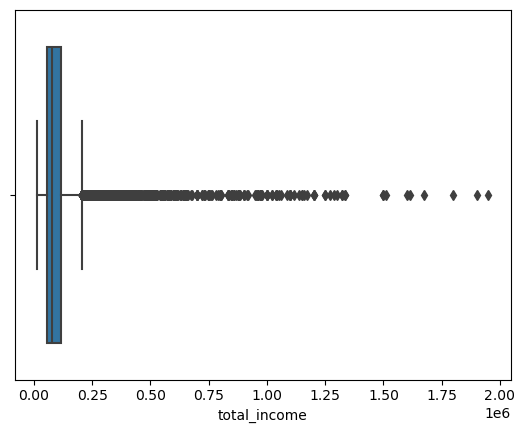

In [113]:
sns.boxplot(data = clean_df, x='total_income')
plt.show()

In [114]:
clean_df.describe()

,annual_salary,compensation,total_income,zscore
count,2.748200e+04,2.748200e+04,2.748200e+04,27482.000000
mean,9.064512e+04,8.831142e+03,9.947627e+04,-0.014595
std,7.043228e+04,3.685620e+04,8.796815e+04,0.133382
min,0.000000e+00,0.000000e+00,1.508000e+04,-0.142561
25%,5.470000e+04,0.000000e+00,5.571475e+04,-0.080948
50%,7.570850e+04,0.000000e+00,7.922500e+04,-0.045301
75%,1.093915e+05,5.200000e+03,1.154088e+05,0.009563
max,1.900000e+06,1.500000e+06,1.950000e+06,2.791268


In [115]:
income_summary = clean_df['total_income'].describe()

min_income = income_summary['min']
max_income = income_summary['max']

print("Minimum Total Income:", min_income)
print("Maximum Total Income:", max_income)

Minimum Total Income: 15080.0
Maximum Total Income: 1950000.0


## Cek Lagi Value Counts Untuk Kolom Kategorikal Setelah Remove Outlier

In [116]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27482 entries, 0 to 27945
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age_range            27482 non-null  object 
 1   industry             27482 non-null  object 
 2   job_title            27482 non-null  object 
 3   annual_salary        27482 non-null  int64  
 4   compensation         27482 non-null  float64
 5   total_income         27482 non-null  float64
 6   current_exp_range    27482 non-null  object 
 7   non_field_exp_range  27482 non-null  object 
 8   degree               27482 non-null  object 
 9   gender               27482 non-null  object 
 10  race                 27482 non-null  object 
 11  country              27482 non-null  object 
 12  zscore               27482 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 2.9+ MB


### age_range

In [117]:
clean_df['age_range'].nunique()

7

In [118]:
clean_df['age_range'].value_counts()

age_range
25-34         12396
35-44          9748
45-54          3127
18-24          1151
55-64           966
65 or over       90
18 less           4
Name: count, dtype: int64

### industry

In [119]:
clean_df['industry'].nunique()

25

In [120]:
pd.DataFrame(clean_df['industry'].value_counts())

,count
industry,
Computing or Tech,4596
Education (Higher Education),2422
Nonprofits,2388
Other Industry,2326
Government and Public Administration,1866
Health care,1854
"Accounting, Banking & Finance",1767
Engineering or Manufacturing,1666
"Marketing, Advertising & PR",1090


### job_title

In [121]:
clean_df['job_title'].nunique()

14157

### current_exp_range

In [122]:
clean_df['current_exp_range'].nunique()

8

In [123]:
clean_df['current_exp_range'].value_counts()

current_exp_range
11 - 20 years       6440
5-7 years           6409
2 - 4 years         6087
8 - 10 years        4893
21 - 30 years       1836
1 year or less      1406
31 - 40 years        374
41 years or more      37
Name: count, dtype: int64

### degree

In [124]:
clean_df['degree'].nunique()

7

In [125]:
clean_df['degree'].value_counts()

degree
College degree         13263
Master's degree         8700
Some college            1994
PhD                     1406
Professional degree     1303
High School              616
Other Degree             200
Name: count, dtype: int64

### gender

In [126]:
clean_df['gender'].nunique()

3

In [127]:
clean_df['gender'].value_counts()

gender
Woman           20998
Man              5314
Other Gender     1170
Name: count, dtype: int64

### race

In [128]:
clean_df['race'].nunique()

49

### country

In [129]:
clean_df['country'].nunique()

28

In [130]:
pd.DataFrame(clean_df['country'].value_counts()).head(28)

,count
country,
USA,22759
Canada,1656
UK,1486
Australia,381
Other country,270
Germany,183
Ireland,122
New zealand,120
Netherlands,84


# Exploratory Data Analysis (EDA)

In [131]:
clean_df=clean_df.drop(columns='zscore')

In [132]:
clean_df

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0.0,55000.0,5-7 years,Tidak Ada Pengalaman Lebih,Master's degree,Woman,White,USA
1,25-34,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,58600.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Other Gender,White,UK
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,0.0,34000.0,2 - 4 years,Tidak Ada Pengalaman Lebih,College degree,Woman,White,USA
3,25-34,Nonprofits,Program Manager,62000,3000.0,65000.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Woman,White,USA
4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,67000.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Woman,White,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
27941,25-34,Computing or Tech,Sr software engineer,190000,14000.0,204000.0,5-7 years,Tidak Ada Pengalaman Lebih,College degree,Man,Asian or Asian American,USA
27942,45-54,Property or Construction,Property Manager,55000,13000.0,68000.0,11 - 20 years,Pengalaman Lebih Selain Bidang Sekarang,Other Degree,Other Gender,Other Race,USA
27943,25-34,Other Industry,Mental Health Therapist,52416,0.0,52416.0,2 - 4 years,Tidak Ada Pengalaman Lebih,Master's degree,Woman,White,USA
27944,18-24,Computing or Tech,Help Desk Associate Analyst,36000,0.0,36000.0,2 - 4 years,Pengalaman Lebih Selain Bidang Sekarang,College degree,Man,Black or African American,USA


## Univariate Analysis

### age_range

#### **age_range x total_income**

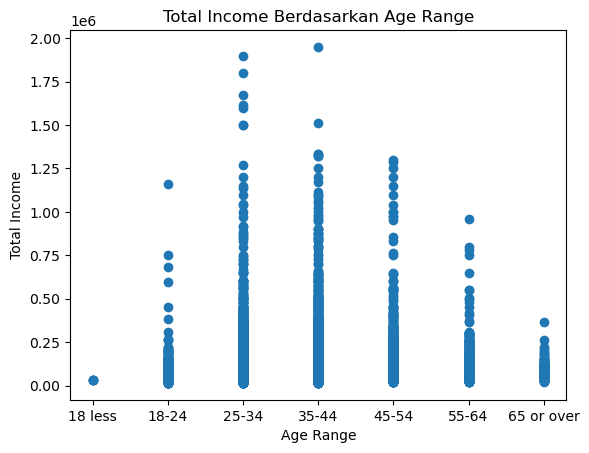

In [133]:
# Urutkan DataFrame berdasarkan age_range
sorted_age_df = clean_df.sort_values(by='age_range')

plt.scatter(sorted_age_df['age_range'], sorted_age_df['total_income'])
plt.xlabel('Age Range')
plt.ylabel('Total Income')
plt.title('Total Income Berdasarkan Age Range')
plt.show()

In [134]:
clean_df.query('age_range == "18-24" & total_income > 1000000')

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
5581,18-24,Agriculture or Forestry,Agricultural Supply line Negotiating consultant,910000,250000.0,1160000.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,Some college,Other Gender,White,UK


In [135]:
clean_df.query('age_range == "35-44" & total_income > 1700000')

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
26935,35-44,"Accounting, Banking & Finance",Managing Director,450000,1500000.0,1950000.0,11 - 20 years,Tidak Ada Pengalaman Lebih,College degree,Man,White,USA


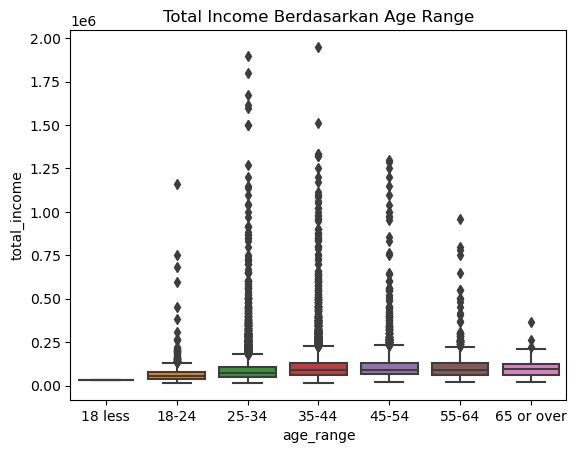

In [136]:
sns.boxplot(data=sorted_age_df, x='age_range', y='total_income')
plt.title('Total Income Berdasarkan Age Range')
plt.show()

In [137]:
clean_df.query('age_range == "25-34" & total_income > 1700000')

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
5755,25-34,Health care,Attending Physician (general internal medicine),1900000,0.0,1900000.0,5-7 years,Tidak Ada Pengalaman Lebih,Professional degree,Woman,White,USA
27857,25-34,Computing or Tech,Senior Tech Lead,1800000,0.0,1800000.0,8 - 10 years,Tidak Ada Pengalaman Lebih,Other Degree,Man,Asian or Asian American,India


In [138]:
clean_df.query('age_range == "18-24" & total_income > 760000')

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
5581,18-24,Agriculture or Forestry,Agricultural Supply line Negotiating consultant,910000,250000.0,1160000.0,5-7 years,Pengalaman Lebih Selain Bidang Sekarang,Some college,Other Gender,White,UK


In [139]:
clean_df.query('age_range == "35-44" & total_income > 1700000')

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
26935,35-44,"Accounting, Banking & Finance",Managing Director,450000,1500000.0,1950000.0,11 - 20 years,Tidak Ada Pengalaman Lebih,College degree,Man,White,USA


**Median total_income berdasarkan age_range**

In [140]:
clean_df.groupby('age_range')['total_income'].median().sort_values(ascending=True)

age_range
18 less       31876.0
18-24         53000.0
25-34         72196.0
55-64         87750.0
35-44         88000.0
45-54         92000.0
65 or over    96303.5
Name: total_income, dtype: float64

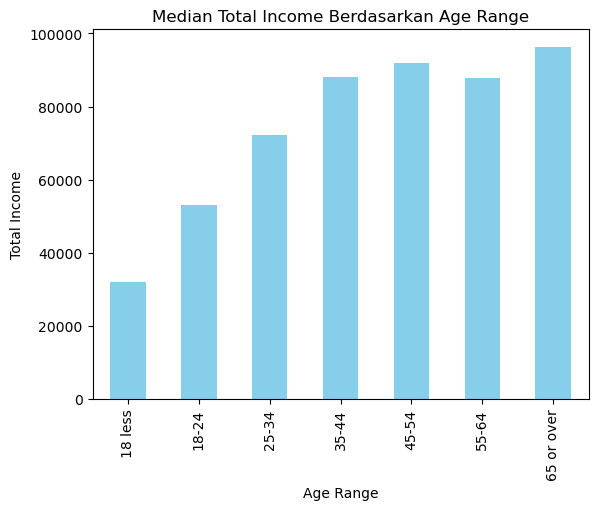

In [141]:
age_range_order = [
    '18 less',
    '18-24',
    '25-34',
    '35-44',
    '45-54',
    "55-64",
    '65 or over'
]

age_income_median = clean_df.groupby('age_range')['total_income'].median().reindex(age_range_order)

age_income_median.plot(kind='bar', color='skyblue')
plt.xlabel('Age Range')
plt.ylabel('Total Income')
plt.title('Median Total Income Berdasarkan Age Range')
plt.show()

**Rata-rata total_income berdasarkan age_range**

In [142]:
round(clean_df.groupby('age_range')['total_income'].mean().sort_values(ascending=True))

age_range
18 less        31798.0
18-24          64279.0
25-34          90018.0
65 or over    101243.0
55-64         106350.0
35-44         110346.0
45-54         113954.0
Name: total_income, dtype: float64

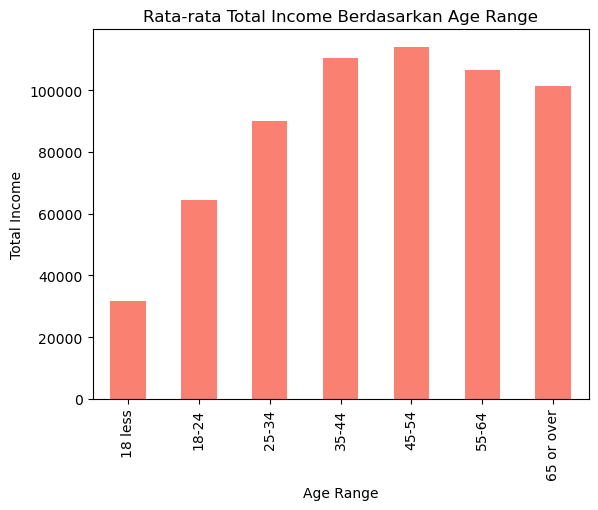

In [143]:
age_range_order = [
    '18 less',
    '18-24',
    '25-34',
    '35-44',
    '45-54',
    "55-64",
    '65 or over'
]

age_income_mean = clean_df.groupby('age_range')['total_income'].mean().reindex(age_range_order)

age_income_mean.plot(kind='bar', color='salmon')
plt.xlabel('Age Range')
plt.ylabel('Total Income')
plt.title('Rata-rata Total Income Berdasarkan Age Range')
plt.show()

#### **age_range x annual_salary**

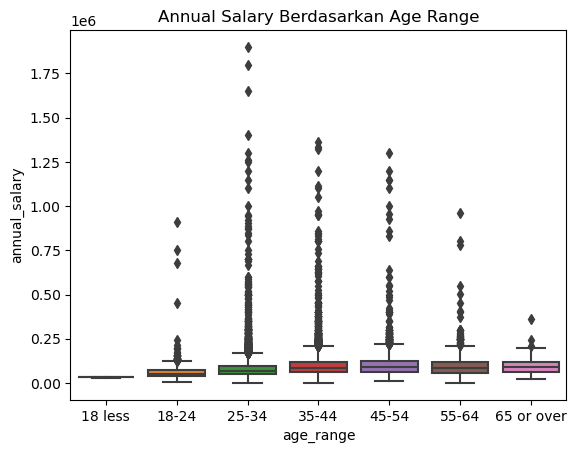

In [144]:
sns.boxplot(data=sorted_age_df, x='age_range', y='annual_salary')
plt.title('Annual Salary Berdasarkan Age Range')
plt.show()

**Median annual_salary berdasarkan age_range**

In [145]:
clean_df.groupby('age_range')['annual_salary'].median().sort_values(ascending=True)

age_range
18 less       31876.0
18-24         51500.0
25-34         70000.0
55-64         83204.0
35-44         85000.0
45-54         89000.0
65 or over    91867.5
Name: annual_salary, dtype: float64

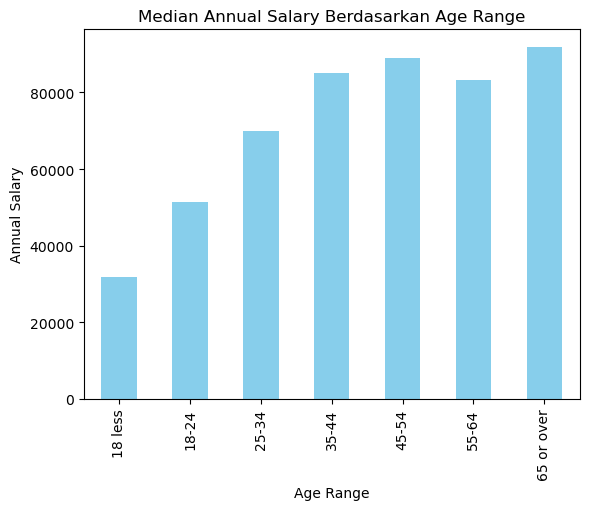

In [146]:
age_range_order = [
    '18 less',
    '18-24',
    '25-34',
    '35-44',
    '45-54',
    "55-64",
    '65 or over'
]

age_annual_median = clean_df.groupby('age_range')['annual_salary'].median().reindex(age_range_order)

age_annual_median.plot(kind='bar', color='skyblue')
plt.xlabel('Age Range')
plt.ylabel('Annual Salary')
plt.title('Median Annual Salary Berdasarkan Age Range')
plt.show()

**Rata-rata annual_salary berdasarkan age_range**

In [147]:
round(clean_df.groupby('age_range')['annual_salary'].mean().sort_values(ascending=True))

age_range
18 less        31798.0
18-24          59469.0
25-34          83003.0
65 or over     97807.0
55-64          98503.0
35-44          99004.0
45-54         103801.0
Name: annual_salary, dtype: float64

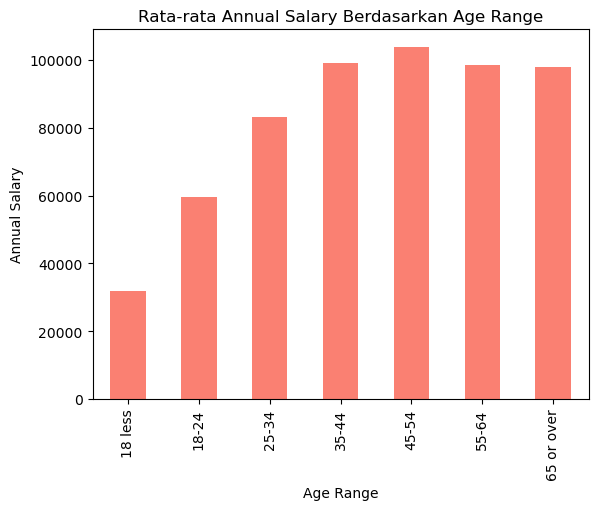

In [148]:
age_range_order = [
    '18 less',
    '18-24',
    '25-34',
    '35-44',
    '45-54',
    "55-64",
    '65 or over'
]

age_annual_mean = clean_df.groupby('age_range')['annual_salary'].mean().reindex(age_range_order)

age_annual_mean.plot(kind='bar', color='salmon')
plt.xlabel('Age Range')
plt.ylabel('Annual Salary')
plt.title('Rata-rata Annual Salary Berdasarkan Age Range')
plt.show()

#### **age_range x compensation**

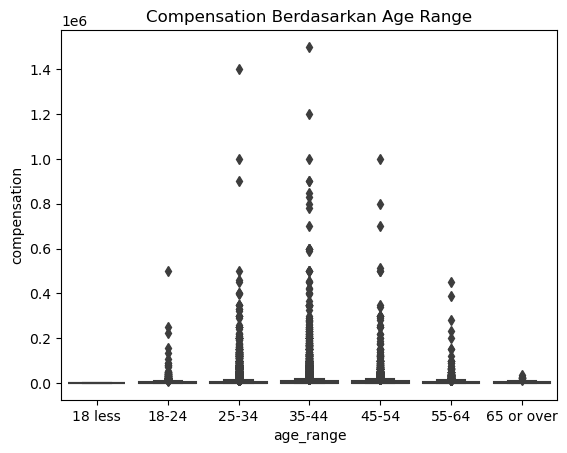

In [149]:
sns.boxplot(data=sorted_age_df, x='age_range', y='compensation')
plt.title('Compensation Berdasarkan Age Range')
plt.show()

**Median Compensation Berdasarkan Age Range**

In [150]:
clean_df.groupby('age_range')['compensation'].median().sort_values(ascending=True)

age_range
18 less       0.0
18-24         0.0
25-34         0.0
35-44         0.0
45-54         0.0
55-64         0.0
65 or over    0.0
Name: compensation, dtype: float64

**Rata-rata Compensation Berdasarkan Age Range**

In [151]:
round(clean_df.groupby('age_range')['compensation'].mean().sort_values(ascending=True))

age_range
18 less           0.0
65 or over     3436.0
18-24          4809.0
25-34          7015.0
55-64          7847.0
45-54         10153.0
35-44         11342.0
Name: compensation, dtype: float64

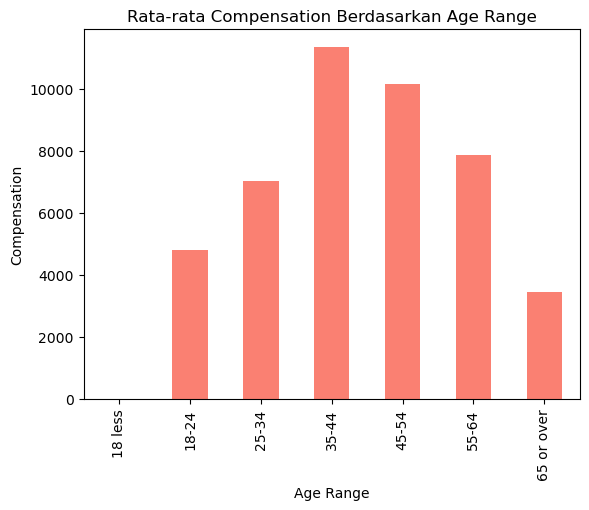

In [152]:
age_comepnsation_mean = clean_df.groupby('age_range')['compensation'].mean().reindex(age_range_order)

age_comepnsation_mean.plot(kind='bar', color='salmon')
plt.xlabel('Age Range')
plt.ylabel('Compensation')
plt.title('Rata-rata Compensation Berdasarkan Age Range')
plt.show()

#### **age_range x industry**

In [153]:
clean_df.groupby('age_range')['industry'].apply(lambda x: x.mode())

age_range    
18 less     0                  Other Industry
18-24       0               Computing or Tech
25-34       0               Computing or Tech
35-44       0               Computing or Tech
45-54       0               Computing or Tech
55-64       0               Computing or Tech
65 or over  0    Education (Higher Education)
Name: industry, dtype: object

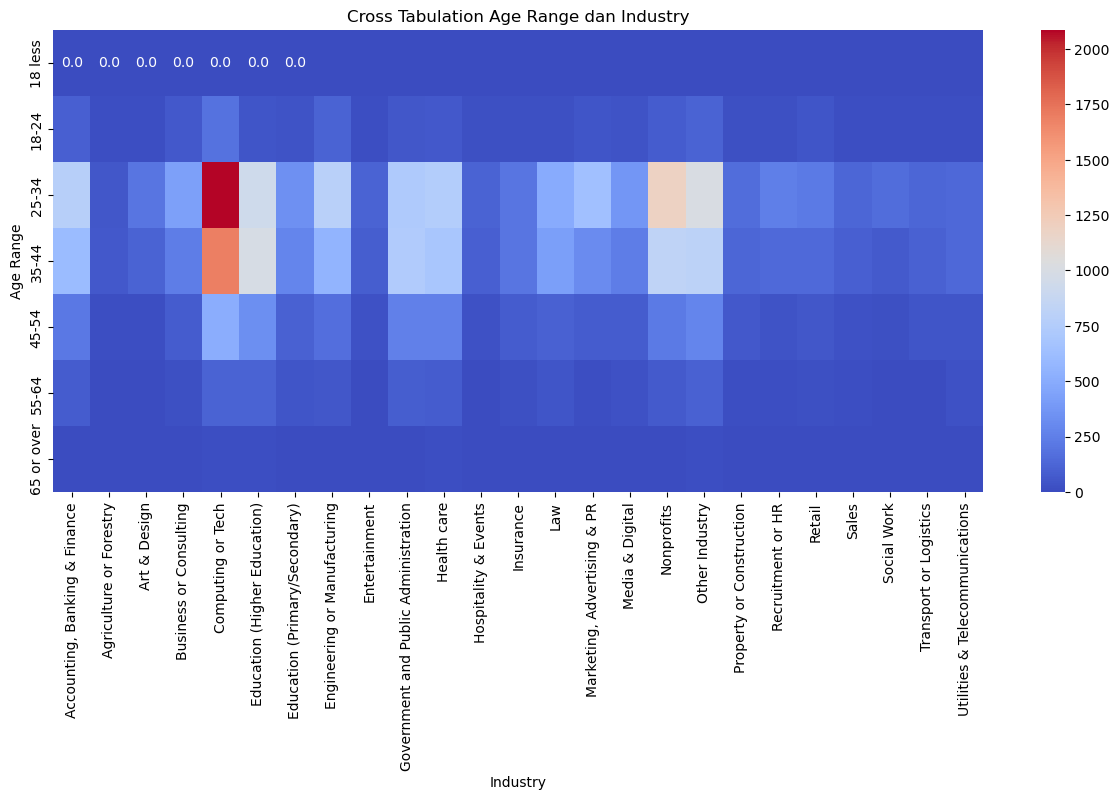

In [154]:
# menghitung frekuensi gabungan dari dua variabel kategorikal menggunakan cross tabulatio
cross_tab = pd.crosstab(clean_df['age_range'], clean_df['industry'])

plt.figure(figsize=(15, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='.1f')
plt.xlabel('Industry')
plt.ylabel('Age Range')
plt.title('Cross Tabulation Age Range dan Industry')
plt.show()

#### **age_range x current_exp_range**

In [155]:
clean_df.groupby('age_range')['current_exp_range'].apply(lambda x: x.mode()[0])

age_range
18 less         2 - 4 years
18-24           2 - 4 years
25-34             5-7 years
35-44         11 - 20 years
45-54         11 - 20 years
55-64         21 - 30 years
65 or over    31 - 40 years
Name: current_exp_range, dtype: object

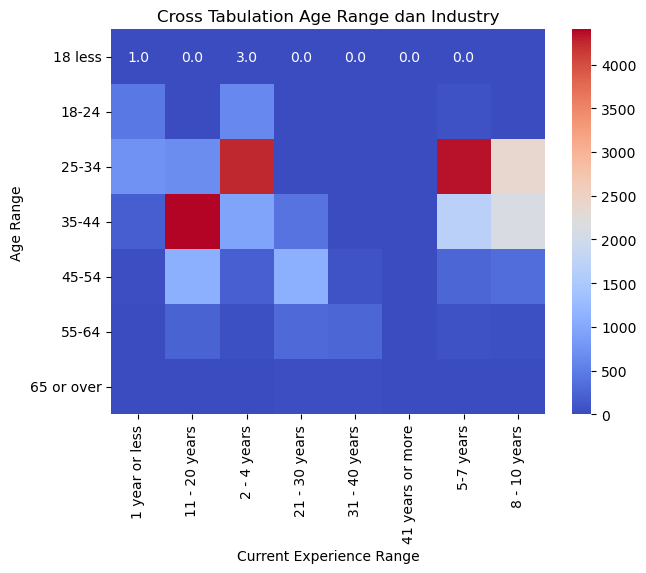

In [156]:
cross_tab = pd.crosstab(clean_df['age_range'], clean_df['current_exp_range'])

plt.figure(figsize=(7, 5))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='.1f')
plt.xlabel('Current Experience Range')
plt.ylabel('Age Range')
plt.title('Cross Tabulation Age Range dan Industry')
plt.show()

#### **age_range x non_field_exp_range**

In [157]:
clean_df.groupby('age_range')['non_field_exp_range'].apply(lambda x: x.mode()[0])

age_range
18 less                    Tidak Ada Pengalaman Lebih
18-24                      Tidak Ada Pengalaman Lebih
25-34                      Tidak Ada Pengalaman Lebih
35-44                      Tidak Ada Pengalaman Lebih
45-54         Pengalaman Lebih Selain Bidang Sekarang
55-64         Pengalaman Lebih Selain Bidang Sekarang
65 or over    Pengalaman Lebih Selain Bidang Sekarang
Name: non_field_exp_range, dtype: object

#### **age_range x degree**

In [158]:
clean_df.groupby('age_range')['degree'].apply(lambda x: x.mode()[0])

age_range
18 less          High School
18-24         College degree
25-34         College degree
35-44         College degree
45-54         College degree
55-64         College degree
65 or over    College degree
Name: degree, dtype: object

#### **age_range x gender**

In [159]:
clean_df.groupby('age_range')['gender'].apply(lambda x: x.mode()[0])

age_range
18 less       Woman
18-24         Woman
25-34         Woman
35-44         Woman
45-54         Woman
55-64         Woman
65 or over    Woman
Name: gender, dtype: object

#### **age_range x race**

In [160]:
clean_df.groupby('age_range')['race'].apply(lambda x: x.mode()[0])

age_range
18 less       White
18-24         White
25-34         White
35-44         White
45-54         White
55-64         White
65 or over    White
Name: race, dtype: object

#### **age_range x country**

In [161]:
clean_df.groupby('age_range')['country'].apply(lambda x: x.mode()[0])

age_range
18 less       USA
18-24         USA
25-34         USA
35-44         USA
45-54         USA
55-64         USA
65 or over    USA
Name: country, dtype: object

### industry

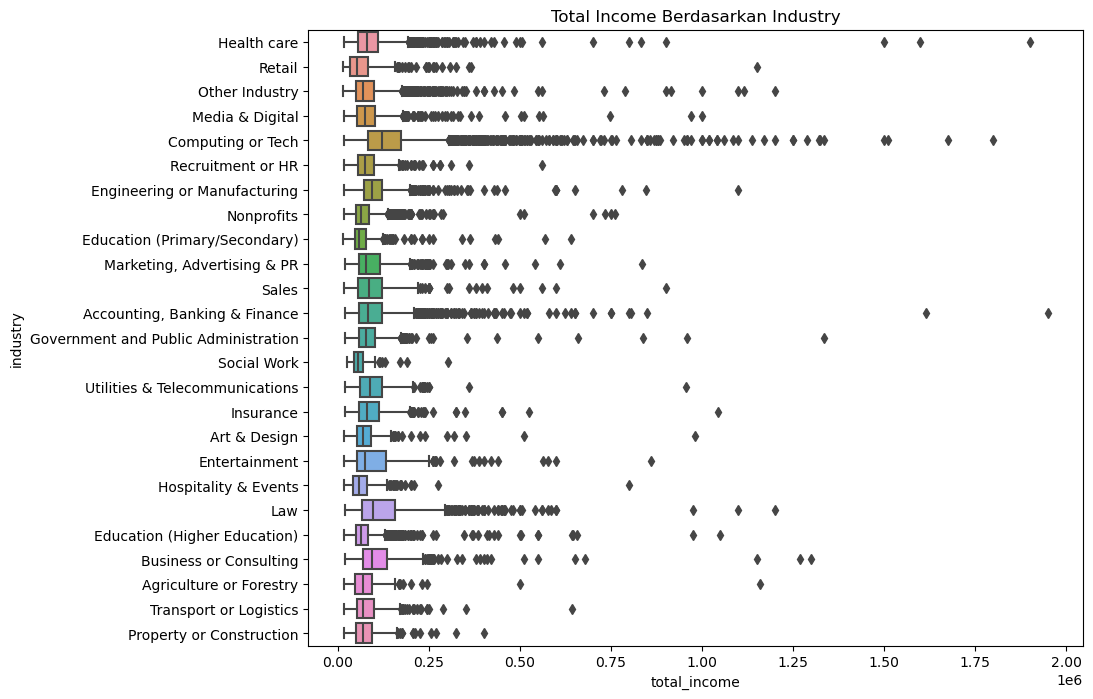

In [162]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=sorted_age_df, x='total_income', y='industry')
plt.title('Total Income Berdasarkan Industry')
plt.show()

In [163]:
clean_df.query('industry =="Accounting, Banking & Finance" & total_income > 1500000')

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
18279,25-34,"Accounting, Banking & Finance",Security Engineer,215000,1400000.0,1615000.0,5-7 years,Tidak Ada Pengalaman Lebih,Some college,Man,White,USA
26935,35-44,"Accounting, Banking & Finance",Managing Director,450000,1500000.0,1950000.0,11 - 20 years,Tidak Ada Pengalaman Lebih,College degree,Man,White,USA


In [164]:
clean_df.query('industry =="Health care" & total_income > 1200000')

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
3162,25-34,Health care,IT Director,1400000,100000.0,1500000.0,8 - 10 years,Tidak Ada Pengalaman Lebih,Master's degree,Woman,White,Denmark
5755,25-34,Health care,Attending Physician (general internal medicine),1900000,0.0,1900000.0,5-7 years,Tidak Ada Pengalaman Lebih,Professional degree,Woman,White,USA
24955,25-34,Health care,Marketing Manager,1250000,350000.0,1600000.0,8 - 10 years,Tidak Ada Pengalaman Lebih,Master's degree,Woman,White,USA


### current_exp_range

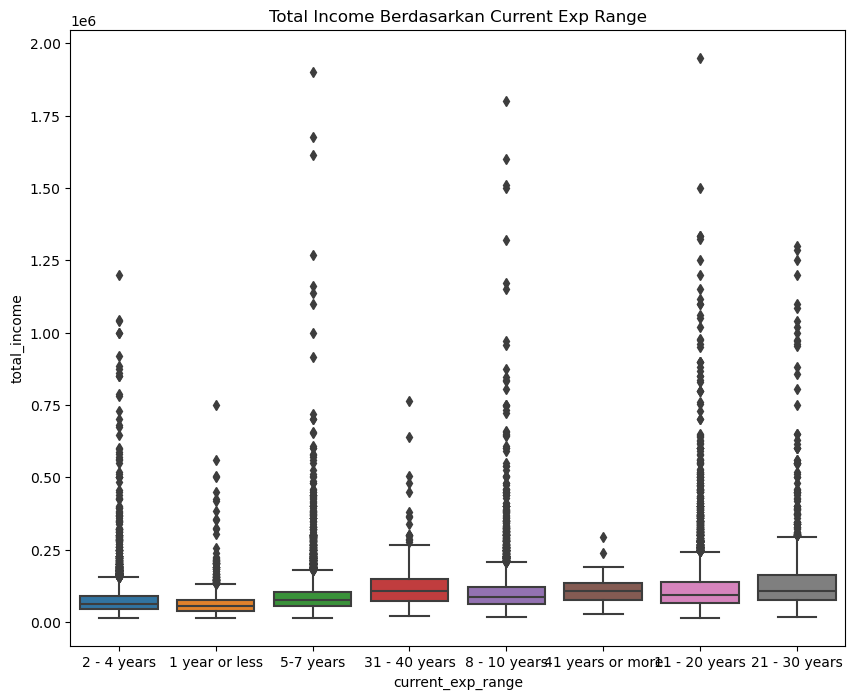

In [165]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=sorted_age_df, x='current_exp_range', y='total_income')
plt.title('Total Income Berdasarkan Current Exp Range')
plt.show()

### non_field_exp_range

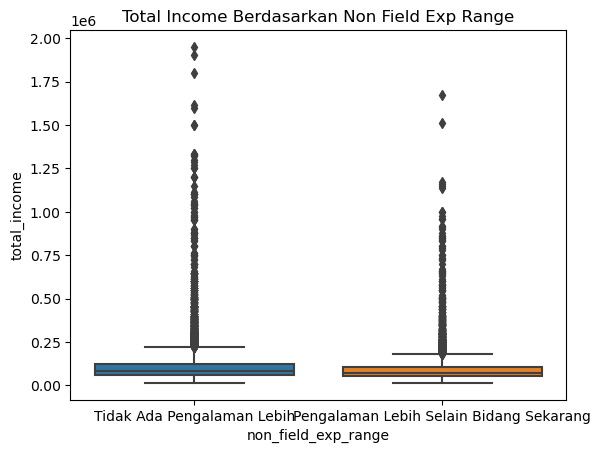

In [166]:
sns.boxplot(data=sorted_age_df, x='non_field_exp_range', y='total_income')
plt.title('Total Income Berdasarkan Non Field Exp Range')
plt.show()

### degree

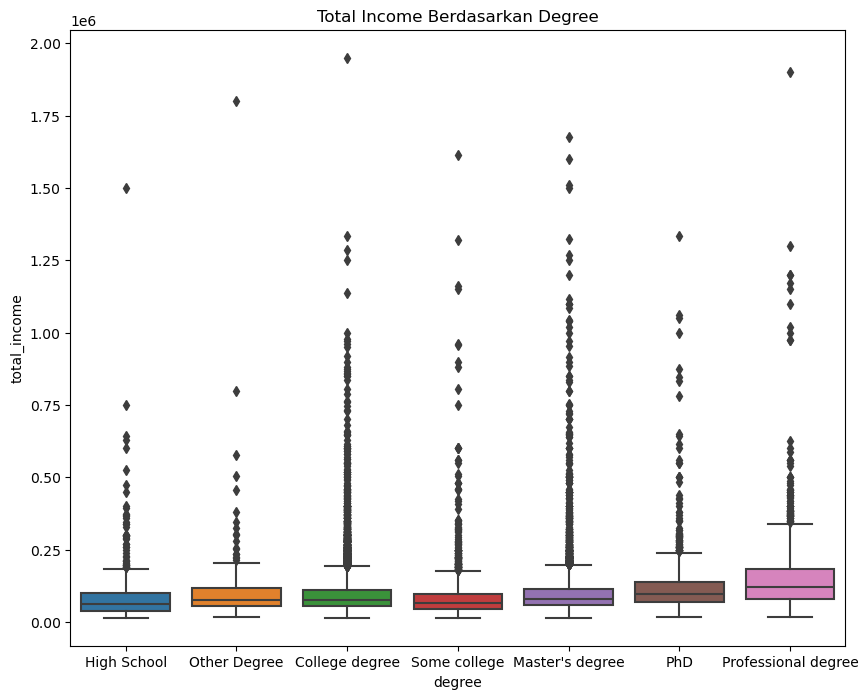

In [167]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=sorted_age_df, x='degree', y='total_income')
plt.title('Total Income Berdasarkan Degree')
plt.show()

### gender

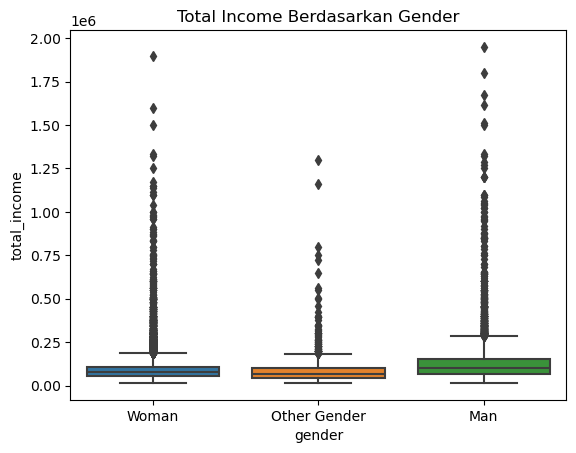

In [168]:
sns.boxplot(data=sorted_age_df, x='gender', y='total_income')
plt.title('Total Income Berdasarkan Gender')
plt.show()

### country

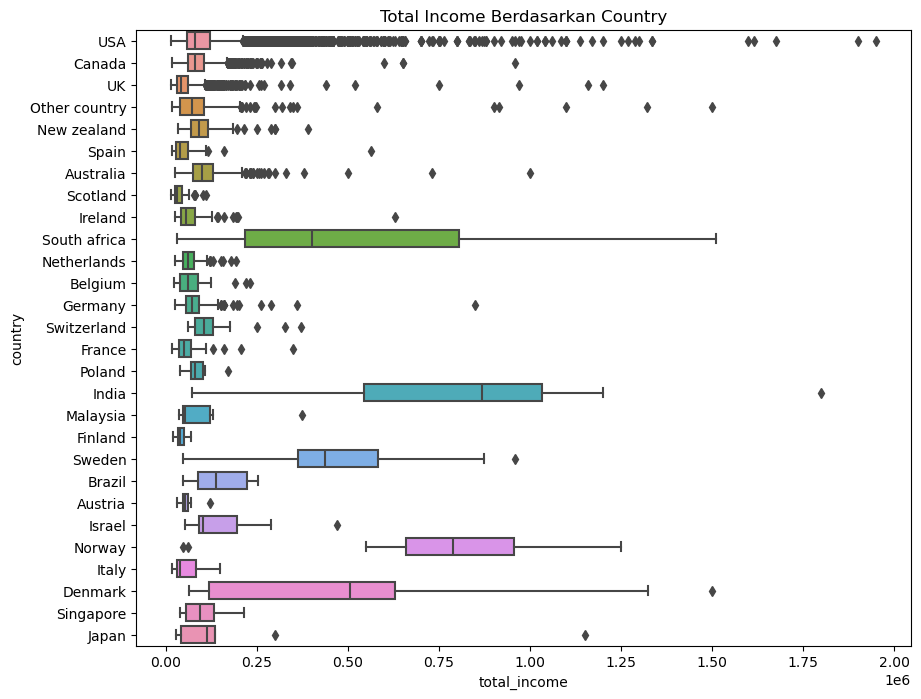

In [169]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=sorted_age_df, x='total_income', y='country')
plt.title('Total Income Berdasarkan Country')
plt.show()

### annual_salary

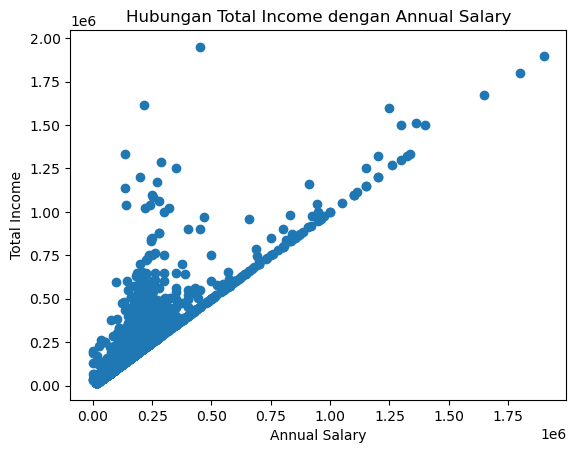

In [170]:
plt.scatter(data=clean_df, x='annual_salary', y='total_income')
plt.xlabel('Annual Salary')
plt.ylabel('Total Income')
plt.title('Hubungan Total Income dengan Annual Salary')
plt.show()

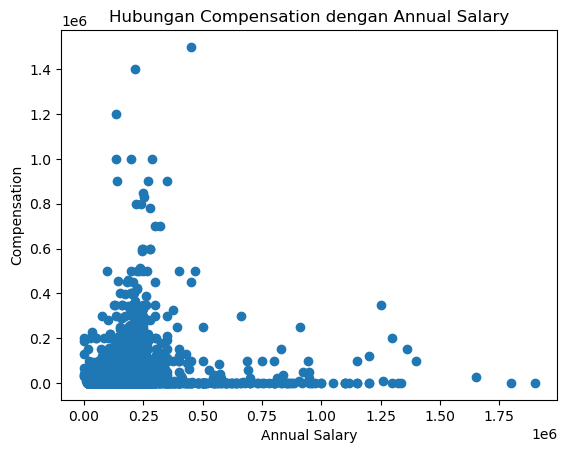

In [171]:
plt.scatter(data=clean_df, x='annual_salary', y='compensation')
plt.xlabel('Annual Salary')
plt.ylabel('Compensation')
plt.title('Hubungan Compensation dengan Annual Salary')
plt.show()

### compensation

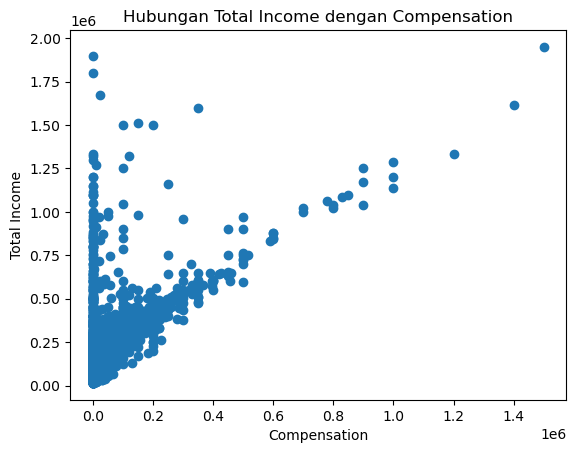

In [172]:
plt.scatter(data=clean_df, x='compensation', y='total_income')
plt.xlabel('Compensation')
plt.ylabel('Total Income')
plt.title('Hubungan Total Income dengan Compensation')
plt.show()

### total_income

In [173]:
clean_df.query('total_income > 1750000')

,age_range,industry,job_title,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
5755,25-34,Health care,Attending Physician (general internal medicine),1900000,0.0,1900000.0,5-7 years,Tidak Ada Pengalaman Lebih,Professional degree,Woman,White,USA
26935,35-44,"Accounting, Banking & Finance",Managing Director,450000,1500000.0,1950000.0,11 - 20 years,Tidak Ada Pengalaman Lebih,College degree,Man,White,USA
27857,25-34,Computing or Tech,Senior Tech Lead,1800000,0.0,1800000.0,8 - 10 years,Tidak Ada Pengalaman Lebih,Other Degree,Man,Asian or Asian American,India


## Multivariate Analysis

<Axes: >

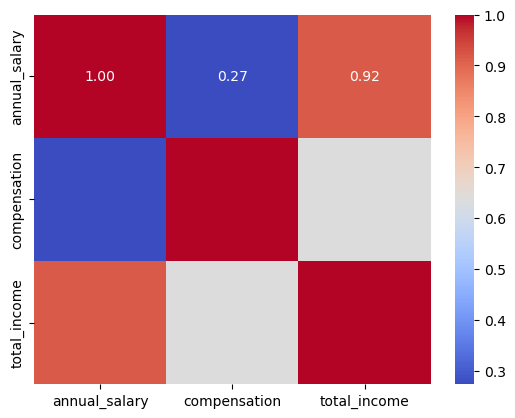

In [174]:
correlation_matrix = clean_df.corr(numeric_only=True)
# plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Distribusi Sampel Data Setiap Variabel

Pada distribusi sampel setiap variabel ini terdapat dua jenis distribusi variabel, yaitu variabel continous dan variabel categorical  

Variabel Continous merupakan variabel yang memiliki nilai numerik. Pada datafram clean_df ini berikut merupakan variabel continousnya  
Variabel Continous:  
1. total_income
2. annual_salary
3. compensation  

Variabel Categorical merupakan variabel yang nilainya tidak numerik, tetapi beberapa kategori.  
Variabel Categorical:  
1. age_range
2. industry
3. current_exp_range
4. non_field_exp_range
5. degree
6. gender
7. race
8. country

In [175]:
clean_df.describe()

,annual_salary,compensation,total_income
count,2.748200e+04,2.748200e+04,2.748200e+04
mean,9.064512e+04,8.831142e+03,9.947627e+04
std,7.043228e+04,3.685620e+04,8.796815e+04
min,0.000000e+00,0.000000e+00,1.508000e+04
25%,5.470000e+04,0.000000e+00,5.571475e+04
50%,7.570850e+04,0.000000e+00,7.922500e+04
75%,1.093915e+05,5.200000e+03,1.154088e+05
max,1.900000e+06,1.500000e+06,1.950000e+06


In [176]:
sample_df = clean_df.sample(frac=0.1, random_state=42)

sample_df merupakan 10% sampel dari clean_df untuk proses visualisasi, pengambilan sampel digunakna agar memudahkan visaulisasi dan tidak memberatkan kerja komputer, karena jika ada data degan entri jutaan, memvisualisasikan keseluruhan data akan terasa berat, sehingga proses sampling untuk melihat distribusi datanya dapat dilakukan

## Distribusi Data total_income

Bentuk distribusi data total_income termasuk distribusi tidak normal. terlihat pada histogram untuk melihat persebaran data total_income bahwa jenis dari persebaran datanya adalah long tailed, karena memiliki ekor yang panjang, yang mana ekor panjang itu adalah representasi nilai total_income yang frekuensinya semakin sedikit tetapi nilai total_income nya semakin besar

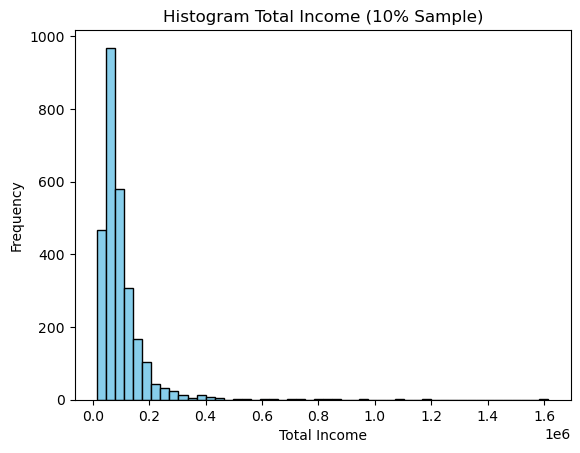

In [177]:
#mengguankan sample_df yaitu 10% sample dari clean_df untuk visualisasi

plt.hist(sample_df['total_income'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Histogram Total Income (10% Sample)')
plt.show()

## Distribusi Data annual_salary

distribusi sampel data annual_salary termasuk ke dalam jenis tidak normal yaitu long tailed, yang mana terdapat nilai annual_salary yang semakin besar tetapi frekuensinya semakin sedikit, sehingga histogram akan menurun dan memanjang seperti ekor

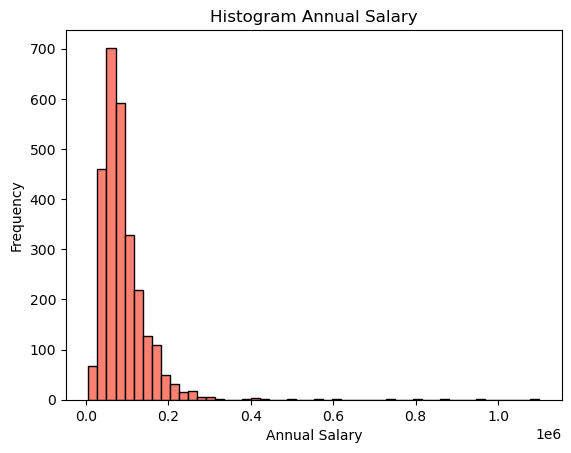

In [178]:
plt.hist(sample_df['annual_salary'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.title('Histogram Annual Salary')
plt.show()

## Distribusi Data compensation

distribusi sampel data compensation termasuk distribusi tidak normal yaitu long tailed, karena terdapat rentang nilai compensation yang jauh dari nilai minimumnya tetapi frekuesninya semakin mengecil

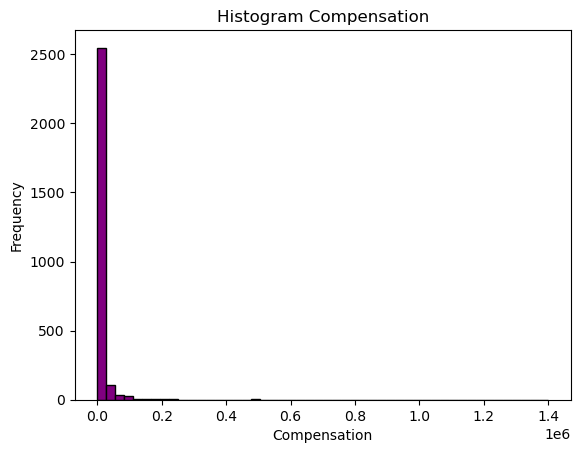

In [179]:
plt.hist(sample_df['compensation'], bins=50, color='purple', edgecolor='black')
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.title('Histogram Compensation')
plt.show()

## Distribusi Data age_range

age_range merupakan variabel categorical, sehingga untuk menampilkan distribusi datanya dapat menggunakan bar chart, yang mana sumbu y merepresentasikan frekuensi atau jumlah data berdasarkan jenis kategorinya. Pada visualisasi ini kategori age_range 18 less tidak terlalu terlihat karena jumlahnya yang sangat sedikit yaitu hanya 4 orang responden

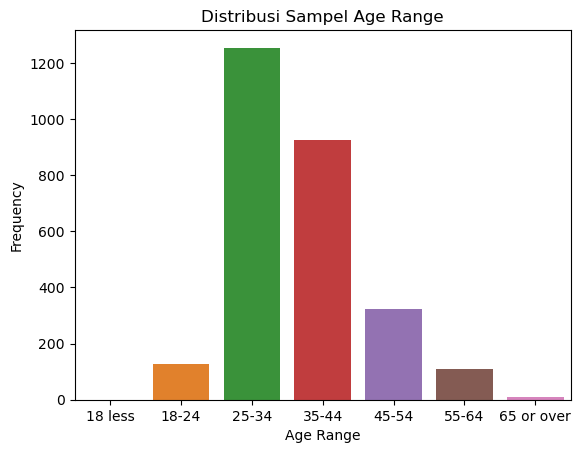

In [180]:
age_range_order = [
    '18 less',
    '18-24',
    '25-34',
    '35-44',
    '45-54',
    "55-64",
    '65 or over'
]

sns.countplot(data=sample_df, x='age_range', order=age_range_order)
plt.title('Distribusi Sampel Age Range')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.show()

In [181]:
age_range_count = clean_df['age_range'].value_counts()

max_age_range = age_range_count.idxmax()
min_age_range = age_range_count.idxmin()

max_count = age_range_count[max_age_range]
min_count = age_range_count[min_age_range]

print("Nilai maksimum dari age_range:", max_age_range)
print("Frekuensi maksimum:", max_count)

print("Nilai minimum dari age_range:", min_age_range)
print("Frekuensi minimum:", min_count)

Nilai maksimum dari age_range: 25-34
Frekuensi maksimum: 12396
Nilai minimum dari age_range: 18 less
Frekuensi minimum: 4


## Distribusi Data industry

industry merupakan variabel categorical, sehingga untuk menampilkan distribusi datanya dapat menggunakan bar chart, yang mana sumbu y merepresentasikan frekuensi atau jumlah data berdasarkan jenis kategorinya. 

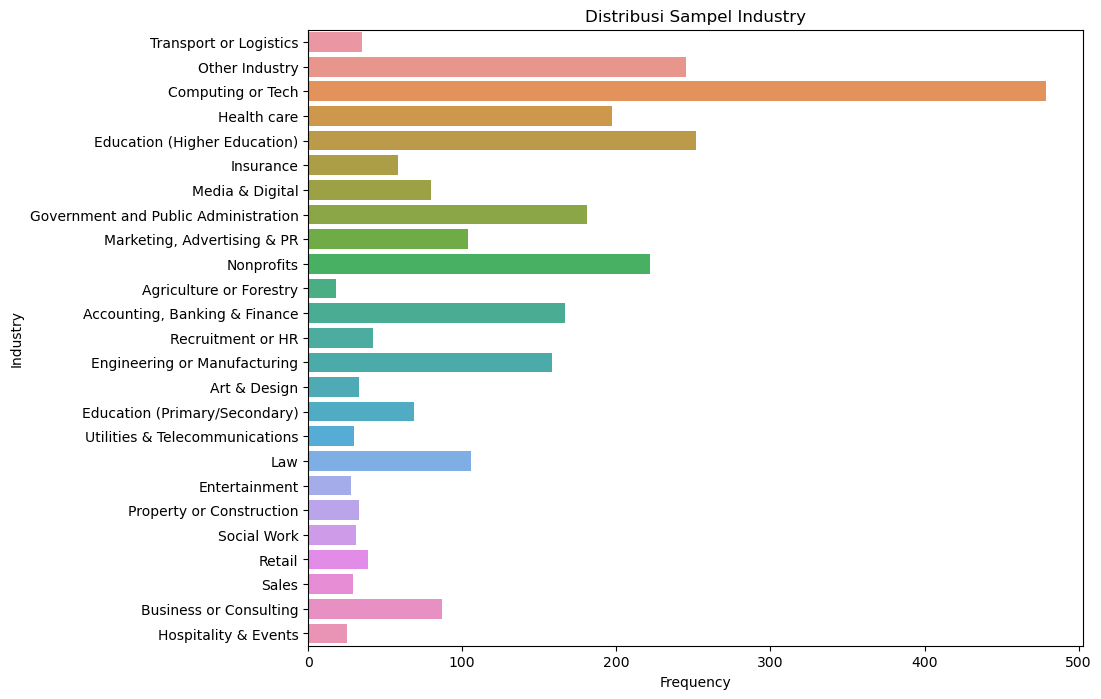

In [182]:
plt.figure(figsize=(10, 8))
sns.countplot(data=sample_df, y='industry')
plt.title('Distribusi Sampel Industry')
plt.xlabel('Frequency')
plt.ylabel('Industry')
plt.show()

## Distribusi Data current_exp_range

current_exp_range merupakan variabel categorical, sehingga untuk menampilkan distribusi datanya dapat menggunakan bar chart, yang mana sumbu y merepresentasikan frekuensi atau jumlah data berdasarkan jenis kategorinya. Variabel ini memiliki 8 buah kategori

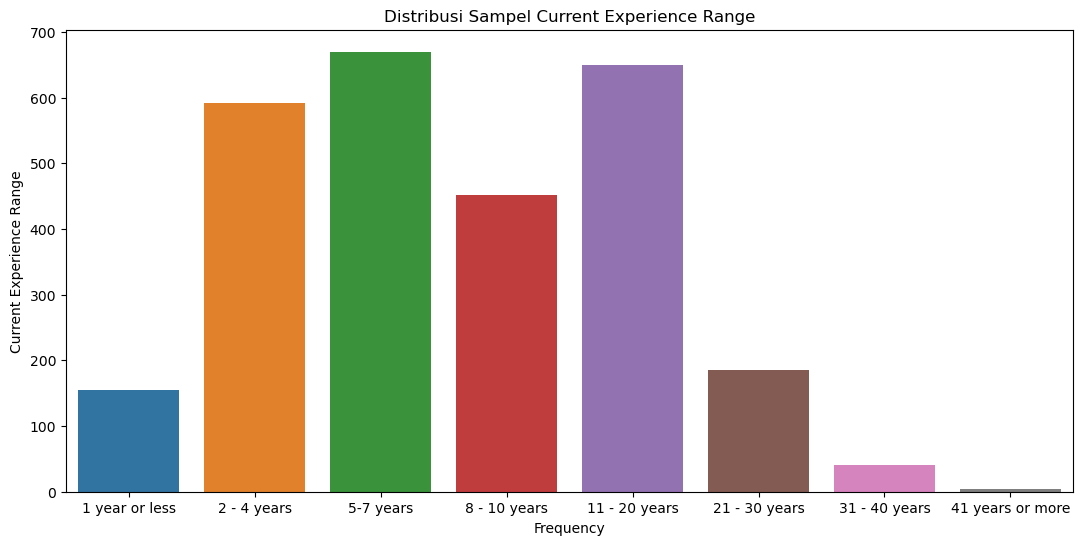

In [183]:
current_exp_order = [
    '1 year or less',
    '2 - 4 years',
    '5-7 years',
    '8 - 10 years',
    '11 - 20 years',
    "21 - 30 years",
    '31 - 40 years',
    '41 years or more',
]

plt.figure(figsize=(13, 6))
sns.countplot(data=sample_df, x='current_exp_range', order=current_exp_order)
plt.title('Distribusi Sampel Current Experience Range')
plt.xlabel('Frequency')
plt.ylabel('Current Experience Range')
plt.show()

## Distribusi Data non_field_exp_range

non_field_exp merupakan variabel categorical, sehingga untuk menampilkan distribusi datanya dapat menggunakan pie chart, alasan penggunaan pie chart karena jumlah kategorinya yang sedikit yaitu hanya dua, sehingga akan lebih relevan jika dilihat dalam tampilan pie chart. Variabel ini merepresentasikan lama pengalaman lebih yang dimiliki oleh responden selain pengalaman di bidang industry saat ini

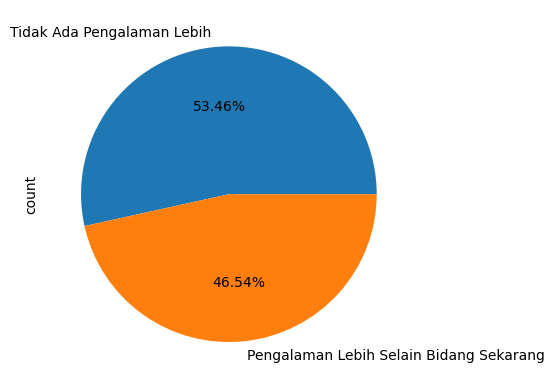

In [184]:
sample_df['non_field_exp_range'].value_counts().plot(kind = 'pie',autopct = "%1.2f%%")
plt.show()

## Distribusi Data degree

degree merupakan variabel categorical, sehingga untuk menampilkan distribusi datanya dapat menggunakan bar chart, yang mana sumbu y merepresentasikan frekuensi atau jumlah data berdasarkan jenis kategorinya. Degree memiliki 7 buah kategori, yang mana setiap kategori dapat merepresentasikan bobot gelaar tertentu, sementara itu Other Degree merupakan gelar untuk responden nilai degreenya null

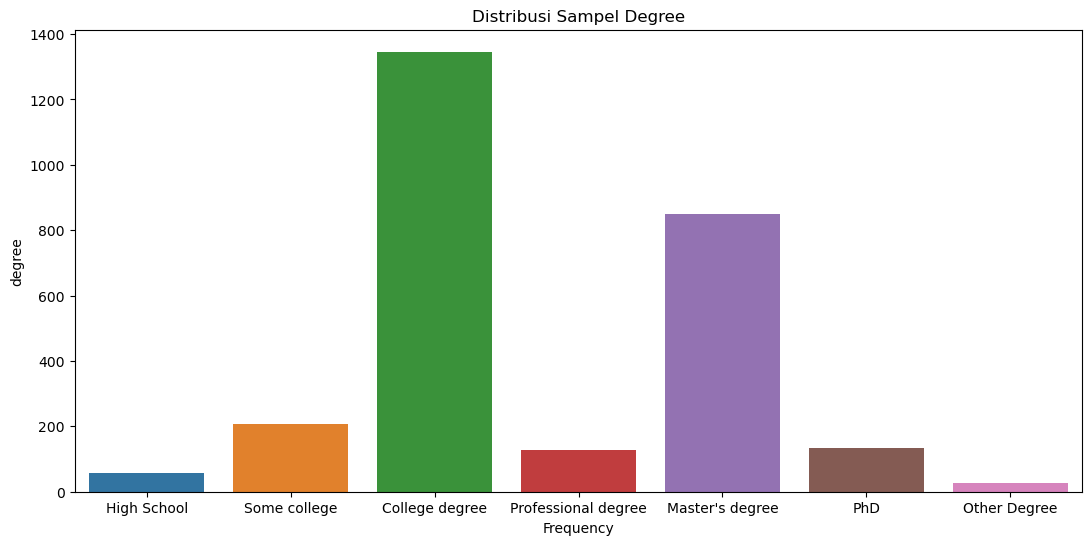

In [185]:
degree_low_order = [
    'High School',
    'Some college',
    'College degree',
    'Professional degree',
    'Master\'s degree',
    'PhD',
    'Other Degree'
]

plt.figure(figsize=(13, 6))
sns.countplot(data=sample_df, x='degree', order=degree_low_order)
plt.title('Distribusi Sampel Degree')
plt.xlabel('Frequency')
plt.ylabel('degree')
plt.show()

## Distribusi Data gender

gender merupakan variabel categorical, sehingga untuk menampilkan distribusi datanya dapat menggunakan pie chart, alasan penggunaan pie chart karena jumlah kategorinya yang sedikit yaitu hanya tifa, sehingga akan lebih relevan jika dilihat dalam tampilan pie chart. Variabel ini merepresentasikan jenis kelamin responden yang terdiiri dari tiga kategori yaitu laki-laki, perempuan, dan other gender

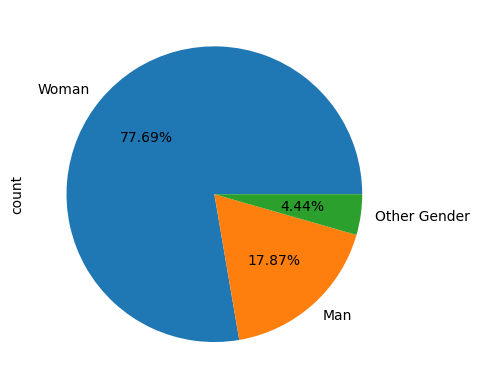

In [186]:
sample_df['gender'].value_counts().plot(kind = 'pie',autopct = "%1.2f%%")
plt.show()

## Distribusi Data race 

race merupakan variabel categorical, sehingga untuk menampilkan distribusi datanya dapat menggunakan bar chart, yang mana sumbu y merepresentasikan racenya sedangan frekuensinya ditampilkan pada sumbu x. race memiliki lebih dari 40 kategori, sehingga ketika menampilkan distribusi datanya akan terlihat sedikit berantakan

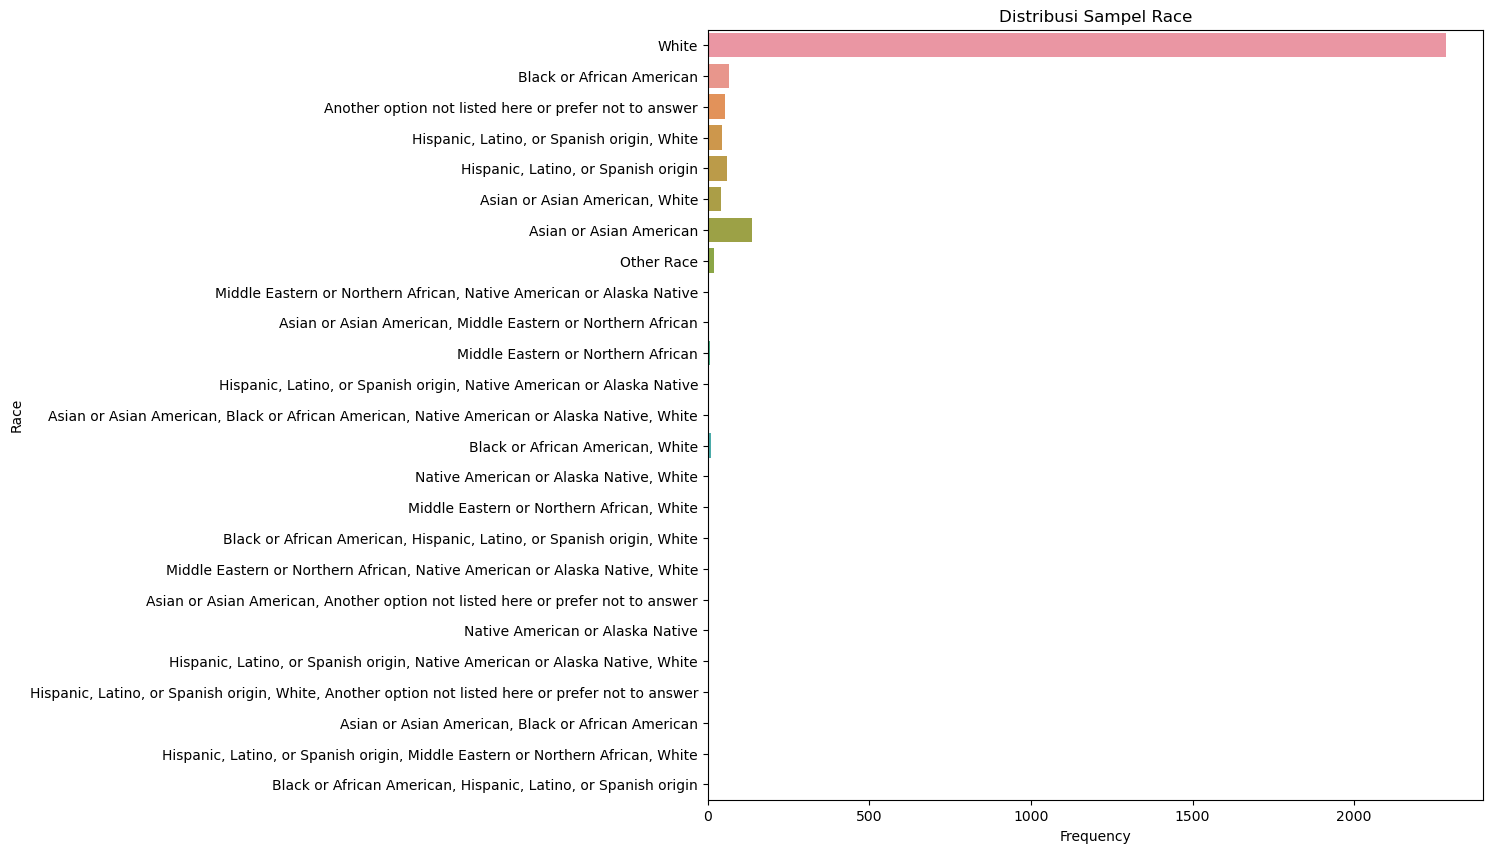

In [187]:
plt.figure(figsize=(10, 10))
sns.countplot(data=sample_df, y='race')
plt.title('Distribusi Sampel Race')
plt.xlabel('Frequency')
plt.ylabel('Race')
plt.show()

## Distribusi Data country

country merupakan variabel categorical, sehingga untuk menampilkan distribusi datanya dapat menggunakan bar chart, yang mana sumbu y merepresentasikan kategorinya dan frekuensinya atau jumlah responden per kategorinya di tampilkan pada sumbu x

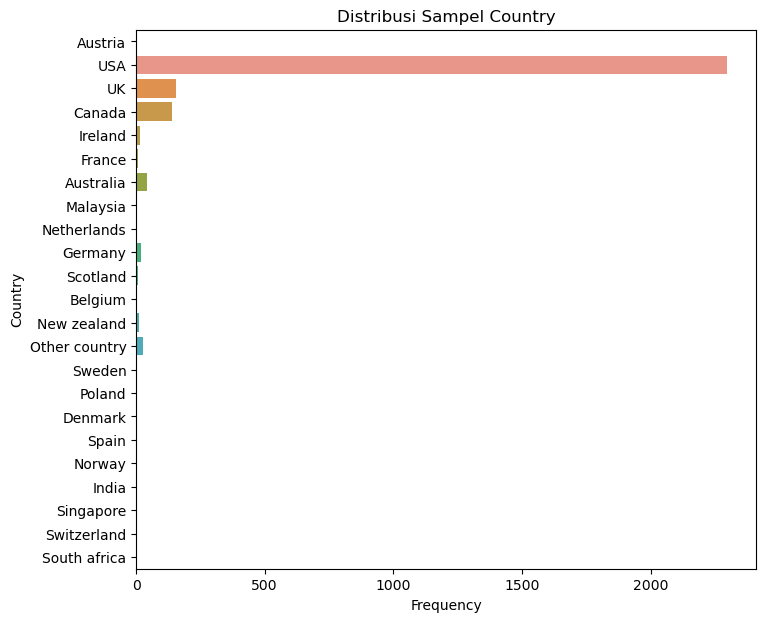

In [188]:
plt.figure(figsize=(8, 7))
sns.countplot(data=sample_df, y='country')
plt.title('Distribusi Sampel Country')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

# T-Test

rata-rata total income di semua rentang umur = 99476  
null hypotesis >> rata-rata total income rentang umur 25-34 == rata-rata total income di semua rentang umur  
alternative hypotesis >> rata-rata total income rentang umur 25-34 != rata-rata total income di semua rentang umur (2 tail)   
level of confidence = 95%  
level of significant = 5%  
n = 30  
degree of freedom = 29  

In [189]:
round(clean_df['total_income'].mean())

99476

In [190]:
round(clean_df['total_income'].std())

87968

In [191]:
confidence_level = 0.95
alpha = 1 - confidence_level
overall_mean = clean_df['total_income'].mean()

#ambil sampel data total_income yg age_range == 25-34
total_income_25_34 = clean_df[clean_df['age_range'] == '25-34']['total_income']

#ukuran sampelnya (limited 30 atau kurang)
sample_size = min(30, len(total_income_25_34))

#random seed agar hasil tetap sama setiap kali dijalankan
np.random.seed(42)

#ambil 30 sampel data total_income dari age_range 25-34
total_income_sample = np.random.choice(total_income_25_34, size=sample_size, replace=False)

sample_mean = total_income_sample.mean()
sample_std = total_income_sample.std(ddof=1)

#menghitung standard error of the mean sample
sem_sample = sample_std / np.sqrt(sample_size)

#menfhitung t-statistic
t_statistic = (sample_mean - overall_mean) / sem_sample

#Degrees of freedom
df = sample_size - 1

#critical t-value
critical_t = stats.t.ppf(1 - alpha/2, df)

#t-test
p_value = stats.t.sf(np.abs(t_statistic), df) * 2  # two-tailed test

print("Sampel:\n", total_income_sample)
print("\nRata-rata sampel:", round(sample_mean))
print("Standar Deviasi sampel:", round(sample_std))
print("Standar Error Mean sampel:", round(sem_sample))
print("Sample Size:", sample_size)
print("\nT-statistic:", t_statistic)
print("Critical t-value:", critical_t)
print("P-value:", p_value)

# if np.abs(t_statistic) > alpha:
if np.abs(t_statistic) > critical_t:
    print("\nReject null hypothesis: There is a significant difference in mean total income for age range 25-34.")
else:
    print("\nFail to reject null hypothesis: There is no significant difference in mean total income for age range 25-34.")

Sampel:
 [150000.  29473.  70000.  71000. 116000.  49250.  84760.  51000.  40500.
  79000. 119000. 105000.  62000.  27500. 150000.  23500.  55775.  60000.
  16000. 160000.  57000.  42000.  30000.  63000.  55000. 118000.  64000.
  59000.  75000.  85000.]

Rata-rata sampel: 72259
Standar Deviasi sampel: 38454
Standar Error Mean sampel: 7021
Sample Size: 30

T-statistic: -3.876800059895729
Critical t-value: 2.045229642132703
P-value: 0.0005584237595019728

Reject null hypothesis: There is a significant difference in mean total income for age range 25-34.


hal yang mendasari pengambilan sampel dari populasi age_range 25-34, karena pada kategori ini jumlah populasi maksimal, jadi dengan asumsi, keseluruhan rata-rata total_income age_range dapat di representasikan dari rentang umur ini, namun hasilnya menyatakan reject hypothesis

**T-Test pada rentang usia 35-44**

rata-rata total income di semua rentang umur = 99476  
null hypotesis >> rata-rata total income rentang umur 35-44 == rata-rata total income di semua rentang umur  
alternative hypotesis >> rata-rata total income rentang umur 35-44 != rata-rata total income di semua rentang umur (2 tail)   
level of confidence = 95%  
level of significant = 5%  
n = 30  
degree of freedom = 29  

In [192]:
confidence_level = 0.95
alpha = 1 - confidence_level
overall_mean = clean_df['total_income'].mean()

#ambil sampel data total_income yg age_range == 25-34
total_income_35_44 = clean_df[clean_df['age_range'] == '35-44']['total_income']

#ukuran sampelnya (limited 30 atau kurang)
sample_size = min(30, len(total_income_35_44))

#random seed agar hasil tetap sama setiap kali dijalankan
np.random.seed(42)

#ambil 30 sampel data total_income dari age_range 25-34
total_income_sample = np.random.choice(total_income_35_44, size=sample_size, replace=False)

sample_mean = total_income_sample.mean()
sample_std = total_income_sample.std(ddof=1)

#menghitung standard error of the mean sample
sem_sample = sample_std / np.sqrt(sample_size)

#menfhitung t-statistic
t_statistic = (sample_mean - overall_mean) / sem_sample

#Degrees of freedom
df = sample_size - 1

#critical t-value
critical_t = stats.t.ppf(1 - alpha/2, df)

#t-test
p_value = stats.t.sf(np.abs(t_statistic), df) * 2  # two-tailed test

print("Sampel:\n", total_income_sample)
print("\nRata-rata sampel:", round(sample_mean))
print("Standar Deviasi sampel:", round(sample_std))
print("Standar Error Mean sampel:", round(sem_sample))
print("Sample Size:", sample_size)
print("\nT-statistic:", t_statistic)
print("Critical t-value:", critical_t)
print("P-value:", p_value)

# if np.abs(t_statistic) > alpha:
if np.abs(t_statistic) > critical_t:
    print("\nReject null hypothesis: There is a significant difference in mean total income for age range 35-44.")
else:
    print("\nFail to reject null hypothesis: There is no significant difference in mean total income for age range 35-44.")

Sampel:
 [  86000.   73880.   96500.   39000.   46000.   63000.   95500.   85000.
   35000.  152000.   68124.   66000.   79000.   65000. 1950000.  145000.
  141000.  230000.   71000.   83500.   85000.   61200.  148500.   44200.
  958000.  105000.   47000.   50000.   62500.   75000.]

Rata-rata sampel: 176897
Standar Deviasi sampel: 373126
Standar Error Mean sampel: 68123
Sample Size: 30

T-statistic: 1.1364796467234453
Critical t-value: 2.045229642132703
P-value: 0.26506028613749055

Fail to reject null hypothesis: There is no significant difference in mean total income for age range 35-44.


hasil dari t-test pada rentang usia 35-44 menyatakan fail to reject, yg artinya ada perbedaan rata-rata total_income yang tipis dari populasi ini terhadap keseluruhan rata-rata total_income age_range. Walaupun rata-rata sampelnya jauh lebih tinggi daripada rata-rata sampel 25-34, karena rata-rata sampel ini tidak dapat menjadi acuan, karena besarnya rata-rata sampel yg dihasilkan, diikuti juga dengan besarnya nilai standar deviasinya, yang artinya varian nilai sampelnya sangat beragam

# ANOVA Test

null hypotesis >> μ18 less == μ18-24 == μ25-34 == μ35-44 == μ45-54 == μ55-64 == μ65 or over  
alternative hypotesis >> μ18 less != μ18-24 != μ25-34 != μ35-44 != μ45-54 != μ55-64 != μ65 or over  
level of confidence = 95%  
level of significant = 5%    

In [193]:
confidence_level = 0.95
alpha = 1 - confidence_level

age_range_groups = []
for age_range, group_data in clean_df.groupby('age_range')['total_income']:
    age_range_groups.append(group_data.tolist())

#ANOVA test
f_statistic, p_value = f_oneway(*age_range_groups)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in mean total_income among age_range groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in mean total_income among age_range groups.")

F-statistic: 96.89014533254287
P-value: 4.909875240443176e-121
Reject null hypothesis: There is a significant difference in mean total_income among age_range groups.


In [194]:
clean_df.groupby('age_range')['total_income'].mean()

age_range
18 less        31798.000000
18-24          64278.813206
25-34          90017.706841
35-44         110346.216968
45-54         113954.035817
55-64         106350.027950
65 or over    101242.644444
Name: total_income, dtype: float64

# Chi-Square

In [195]:
def chi_square_test(df, var1, var2, confidence_level):
    crosstab = pd.crosstab(df[var1], df[var2])
    
    # chi-square test
    chi2, p_value, _, _ = chi2_contingency(crosstab)
    
    # degrees of freedom
    degrees_of_freedom = (crosstab.shape[0] - 1) * (crosstab.shape[1] - 1)
    
    # chi-square critical value
    alpha = 1 - confidence_level
    chi_critical_value = stats.chi2.ppf(q=alpha, df=degrees_of_freedom)

    print(f"Chi-square statistic: {chi2}")
    print(f"Chi-square critical value: {chi_critical_value}")
    print(f"P-value: {p_value}")
    
    # if p_value < alpha:
    if chi2 > chi_critical_value:
        print("Reject null hypothesis: There is a significant dependence between", var1, "and", var2)
    else:
        print("Fail to reject null hypothesis: There is no significant dependence between", var1, "and", var2)

## Chi-Square age_range dan current_exp_range

null hypotesis >> kedua variabel age_range dan current_exp_range merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan age_range dengan current_exp_range   
level of confidence = 95%  
level of significant = 5%    

In [196]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'age_range', 'current_exp_range', confidence_level)

Chi-square statistic: 25206.653868912756
Chi-square critical value: 28.14404949668263
P-value: 0.0
Reject null hypothesis: There is a significant dependence between age_range and current_exp_range


## Chi-Square age_range dan industry

null hypotesis >> kedua variabel age_range dan industry merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan age_range dengan industry  
level of confidence = 95%  
level of significant = 5%   

In [197]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'age_range', 'industry', confidence_level)

Chi-square statistic: 695.3854711329927
Chi-square critical value: 117.26828137255845
P-value: 3.917309178206573e-73
Reject null hypothesis: There is a significant dependence between age_range and industry


## Chi-Square age_range dan non_field_exp_range

null hypotesis >> kedua variabel age_range dan non_field_exp_range merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan age_range dengan non_field_exp_range  
level of confidence = 95%  
level of significant = 5%   

In [198]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'age_range', 'non_field_exp_range', confidence_level)

Chi-square statistic: 319.5745662337632
Chi-square critical value: 1.6353828943279072
P-value: 5.209006035173884e-66
Reject null hypothesis: There is a significant dependence between age_range and non_field_exp_range


## Chi-Square age_range dan degree

null hypotesis >> kedua variabel age_range dan degree merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan age_range dengan degree  
level of confidence = 95%  
level of significant = 5%   

In [199]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'age_range', 'degree', confidence_level)

Chi-square statistic: 1375.452305433482
Chi-square critical value: 23.26860901889377
P-value: 1.0475539926014077e-265
Reject null hypothesis: There is a significant dependence between age_range and degree


## Chi-Square age_range dan race

null hypotesis >> kedua variabel age_range dan race merupakan variabel independen
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan age_range dengan race  
level of confidence = 95%  
level of significant = 5%

In [200]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'age_range', 'race', confidence_level)

Chi-square statistic: 848.8386309223499
Chi-square critical value: 249.6928003072473
P-value: 1.105225507850642e-56
Reject null hypothesis: There is a significant dependence between age_range and race


## Chi-Square age_range dan gender

null hypotesis >> kedua variabel age_range dan gender merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan age_range dengan gender  
level of confidence = 95%  
level of significant = 5%   

In [201]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'age_range', 'gender', confidence_level)

Chi-square statistic: 178.59509118427525
Chi-square critical value: 5.226029488392641
P-value: 8.28536367928782e-32
Reject null hypothesis: There is a significant dependence between age_range and gender


## Chi-Square age_range dan country

null hypotesis >> kedua variabel age_range dan country merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan age_range dengan country  
level of confidence = 95%  
level of significant = 5%   

In [202]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'age_range', 'country', confidence_level)

Chi-square statistic: 188.84438009998598
Chi-square critical value: 133.57246610979638
P-value: 0.07315521378263336
Reject null hypothesis: There is a significant dependence between age_range and country


## Chi-Square industry dan current_exp_range

null hypotesis >> kedua variabel industry dan current_exp_range merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan industry dengan current_exp_range  
level of confidence = 95%  
level of significant = 5%   

In [203]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'industry', 'current_exp_range', confidence_level)

Chi-square statistic: 568.6965875293065
Chi-square critical value: 139.02841008786217
P-value: 5.3904993247345105e-45
Reject null hypothesis: There is a significant dependence between industry and current_exp_range


## Chi-Square industry dan non_field_exp_range

null hypotesis >> kedua variabel industry dan non_field_exp_range merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan industry dengan non_field_exp_range  
level of confidence = 95%  
level of significant = 5%

In [204]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'industry', 'non_field_exp_range', confidence_level)

Chi-square statistic: 316.29690132175136
Chi-square critical value: 13.848425027170226
P-value: 8.6427314578844e-53
Reject null hypothesis: There is a significant dependence between industry and non_field_exp_range


## Chi-Square industry dan degree

null hypotesis >> kedua variabel industry dan degree merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan industry dengan degree   
level of confidence = 95%  
level of significant = 5%  

In [205]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'industry', 'degree', confidence_level)

Chi-square statistic: 11684.38398183701
Chi-square critical value: 117.26828137255845
P-value: 0.0
Reject null hypothesis: There is a significant dependence between industry and degree


## Chi-Square industry dan gender

null hypotesis >> kedua variabel industry dan gender merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan industry dengan gender   
level of confidence = 95%  
level of significant = 5%  

In [206]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'industry', 'gender', confidence_level)

Chi-square statistic: 2570.587364561799
Chi-square critical value: 33.098077429486295
P-value: 0.0
Reject null hypothesis: There is a significant dependence between industry and gender


## Chi-Square industry dan race

null hypotesis >> kedua variabel industry dan race merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan industry dengan race   
level of confidence = 95%  
level of significant = 5%  

In [207]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'industry', 'race', confidence_level)

Chi-square statistic: 1528.0839206471423
Chi-square critical value: 1074.2002973505653
P-value: 5.063074210378693e-13
Reject null hypothesis: There is a significant dependence between industry and race


## Chi-Square industry dan country

null hypotesis >> kedua variabel industry dan country merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan industry dengan country   
level of confidence = 95%  
level of significant = 5%  

In [208]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'industry', 'country', confidence_level)

Chi-square statistic: 1207.049514028942
Chi-square critical value: 589.9439053827867
P-value: 3.458704531444922e-36
Reject null hypothesis: There is a significant dependence between industry and country


## Chi-Square current_exp_range dan non_field_exp_range

null hypotesis >> kedua variabel current_exp_range dan non_field_exp_range merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan current_exp_range dengan non_field_exp_range     
level of confidence = 95%  
level of significant = 5%  

In [209]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'current_exp_range', 'non_field_exp_range', confidence_level)

Chi-square statistic: 3176.1550936550175
Chi-square critical value: 2.167349909298058
P-value: 0.0
Reject null hypothesis: There is a significant dependence between current_exp_range and non_field_exp_range


## Chi-Square current_exp_range dan degree

null hypotesis >> kedua variabel current_exp_range dan degree merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan current_exp_range dengan degree     
level of confidence = 95%  
level of significant = 5%  

In [210]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'current_exp_range', 'degree', confidence_level)

Chi-square statistic: 504.5212322020268
Chi-square critical value: 28.14404949668263
P-value: 1.3526493510604034e-80
Reject null hypothesis: There is a significant dependence between current_exp_range and degree


## Chi-Square current_exp_range dan race

null hypotesis >> kedua variabel current_exp_range dan race merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan current_exp_range dengan race     
level of confidence = 95%  
level of significant = 5%  

In [211]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'current_exp_range', 'race', confidence_level)

Chi-square statistic: 773.9954038843932
Chi-square critical value: 294.5274467403371
P-value: 1.3899987248318622e-36
Reject null hypothesis: There is a significant dependence between current_exp_range and race


## Chi-Square current_exp_range dan country

null hypotesis >> kedua variabel current_exp_range dan country merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan current_exp_range dengan country     
level of confidence = 95%  
level of significant = 5%  

In [212]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'current_exp_range', 'country', confidence_level)

Chi-square statistic: 209.27027679076446
Chi-square critical value: 158.1971047351025
P-value: 0.14882389377352745
Reject null hypothesis: There is a significant dependence between current_exp_range and country


## Chi-Square no_field_exp_range dan degree

null hypotesis >> kedua variabel no_field_exp_range dan degree merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan no_field_exp_range dengan degree     
level of confidence = 95%  
level of significant = 5%  

In [213]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'non_field_exp_range', 'degree', confidence_level)

Chi-square statistic: 151.6966406041203
Chi-square critical value: 1.6353828943279072
P-value: 3.38692302726311e-30
Reject null hypothesis: There is a significant dependence between non_field_exp_range and degree


## Chi-Square no_field_exp_range dan gender

null hypotesis >> kedua variabel no_field_exp_range dan gender merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan no_field_exp_range dengan gender     
level of confidence = 95%  
level of significant = 5%  

In [214]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'non_field_exp_range', 'gender', confidence_level)

Chi-square statistic: 151.39547628337078
Chi-square critical value: 0.10258658877510116
P-value: 1.3331838146058478e-33
Reject null hypothesis: There is a significant dependence between non_field_exp_range and gender


## Chi-Square no_field_exp_range dan race

null hypotesis >> kedua variabel no_field_exp_range dan race merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan no_field_exp_range dengan race     
level of confidence = 95%  
level of significant = 5%  

In [215]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'non_field_exp_range', 'race', confidence_level)

Chi-square statistic: 86.90236879777906
Chi-square critical value: 33.098077429486295
P-value: 0.0004993576681270825
Reject null hypothesis: There is a significant dependence between non_field_exp_range and race


## Chi-Square no_field_exp_range dan country

null hypotesis >> kedua variabel no_field_exp_range dan country merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan no_field_exp_range dengan country     
level of confidence = 95%  
level of significant = 5%  

In [216]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'non_field_exp_range', 'country', confidence_level)

Chi-square statistic: 37.79612273261371
Chi-square critical value: 16.151395849664116
P-value: 0.08113968938561672
Reject null hypothesis: There is a significant dependence between non_field_exp_range and country


## Chi-Square degree dan gender

null hypotesis >> kedua variabel degree dan gender merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan degree dengan gender     
level of confidence = 95%  
level of significant = 5%  

In [217]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'degree', 'gender', confidence_level)

Chi-square statistic: 509.06639687077234
Chi-square critical value: 5.226029488392641
P-value: 2.6047071209120692e-101
Reject null hypothesis: There is a significant dependence between degree and gender


## Chi-Square degree dan race

null hypotesis >> kedua variabel degree dan race merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan degree dengan race     
level of confidence = 95%  
level of significant = 5%  

In [218]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'degree', 'race', confidence_level)

Chi-square statistic: 1893.6504335340562
Chi-square critical value: 249.6928003072473
P-value: 7.774555979119355e-234
Reject null hypothesis: There is a significant dependence between degree and race


## Chi-Square degree dan country

null hypotesis >> kedua variabel degree dan country merupakan variabel independen  
alternative hypotesis >> terdapat variabel independen dan dependen antara hubungan degree dengan country     
level of confidence = 95%  
level of significant = 5%  

In [219]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi_square_test(clean_df, 'degree', 'country', confidence_level)

Chi-square statistic: 862.9558305832802
Chi-square critical value: 133.57246610979638
P-value: 4.387949936613987e-96
Reject null hypothesis: There is a significant dependence between degree and country


# Linear Regression

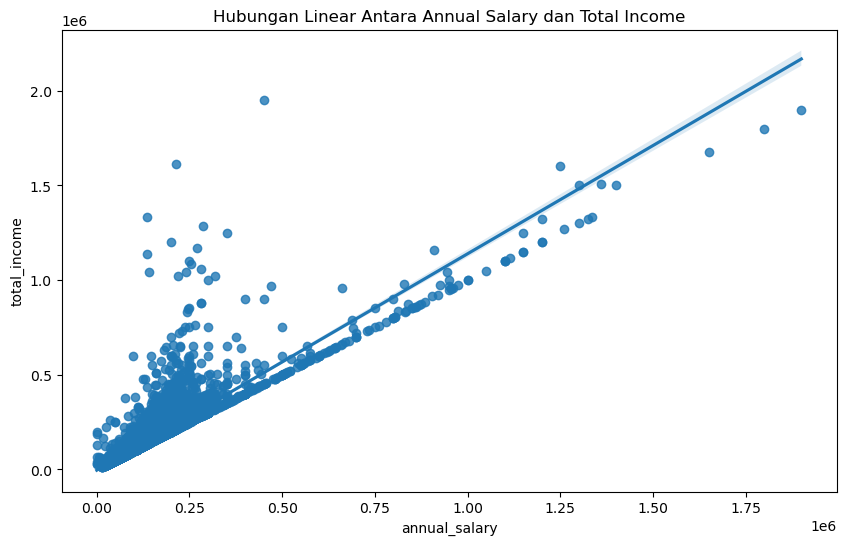

In [220]:
plt.figure(figsize=(10,6))
sns.regplot(data=clean_df, x='annual_salary', y='total_income')
plt.title('Hubungan Linear Antara Annual Salary dan Total Income')
plt.show()

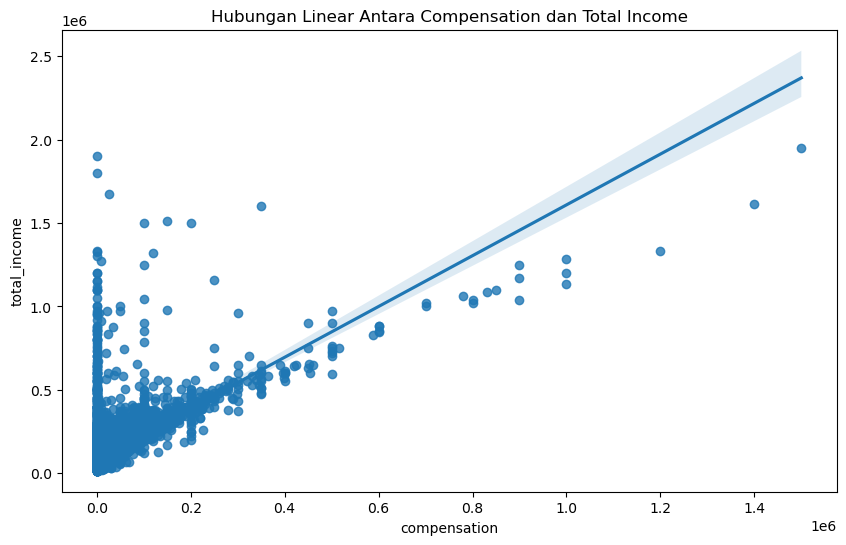

In [221]:
plt.figure(figsize=(10,6))
sns.regplot(data=clean_df, x='compensation', y='total_income')
plt.title('Hubungan Linear Antara Compensation dan Total Income')
plt.show()

## Buat Dataframe Baru dan Mapping Variabel Kategorikal

In [222]:
clean_df.columns

Index(['age_range', 'industry', 'job_title', 'annual_salary', 'compensation',
       'total_income', 'current_exp_range', 'non_field_exp_range', 'degree',
       'gender', 'race', 'country'],
      dtype='object')

In [223]:
train_df = clean_df.drop(columns=['job_title'])

In [224]:
train_df.columns

Index(['age_range', 'industry', 'annual_salary', 'compensation',
       'total_income', 'current_exp_range', 'non_field_exp_range', 'degree',
       'gender', 'race', 'country'],
      dtype='object')

In [225]:
age_mapping = {
    '18 less': 1,
    '18-24': 2,
    '25-34': 3,
    '35-44': 4,
    '45-54': 5,
    '55-64': 6,
    '65 or over': 7
}

train_df['age_range'] = clean_df['age_range'].map(age_mapping)

In [226]:
exp_mapping = {
    '1 year or less': 1,
    '2 - 4 years': 2,
    '5-7 years': 3,
    '8 - 10 years': 4,
    '11 - 20 years': 5,
    '21 - 30 years': 6,
    '31 - 40 years': 7,
    '41 years or more': 8
}

train_df['current_exp_range'] = clean_df['current_exp_range'].map(exp_mapping)

In [227]:
non_exp_mapping = {
    'Tidak Ada Pengalaman Lebih': 0,
    'Pengalaman Lebih Selain Bidang Sekarang': 1
}

train_df['non_field_exp_range'] = clean_df['non_field_exp_range'].map(non_exp_mapping)

In [228]:
degree_mapping = {
    'College degree': 4,
    "Master's degree": 6,
    'Some college': 3,
    'PhD': 7,
    'Professional degree': 5,
    'High School': 2,
    'Other Degree': 1
}

train_df['degree'] = clean_df['degree'].map(degree_mapping)

In [229]:
train_df.columns

Index(['age_range', 'industry', 'annual_salary', 'compensation',
       'total_income', 'current_exp_range', 'non_field_exp_range', 'degree',
       'gender', 'race', 'country'],
      dtype='object')

In [230]:
train_df

,age_range,industry,annual_salary,compensation,total_income,current_exp_range,non_field_exp_range,degree,gender,race,country
0,3,Education (Higher Education),55000,0.0,55000.0,3,0,6,Woman,White,USA
1,3,Computing or Tech,54600,4000.0,58600.0,3,1,4,Other Gender,White,UK
2,3,"Accounting, Banking & Finance",34000,0.0,34000.0,2,0,4,Woman,White,USA
3,3,Nonprofits,62000,3000.0,65000.0,3,1,4,Woman,White,USA
4,3,"Accounting, Banking & Finance",60000,7000.0,67000.0,3,1,4,Woman,White,USA
...,...,...,...,...,...,...,...,...,...,...,...
27941,3,Computing or Tech,190000,14000.0,204000.0,3,0,4,Man,Asian or Asian American,USA
27942,5,Property or Construction,55000,13000.0,68000.0,5,1,1,Other Gender,Other Race,USA
27943,3,Other Industry,52416,0.0,52416.0,2,0,6,Woman,White,USA
27944,2,Computing or Tech,36000,0.0,36000.0,2,1,4,Man,Black or African American,USA


<Axes: >

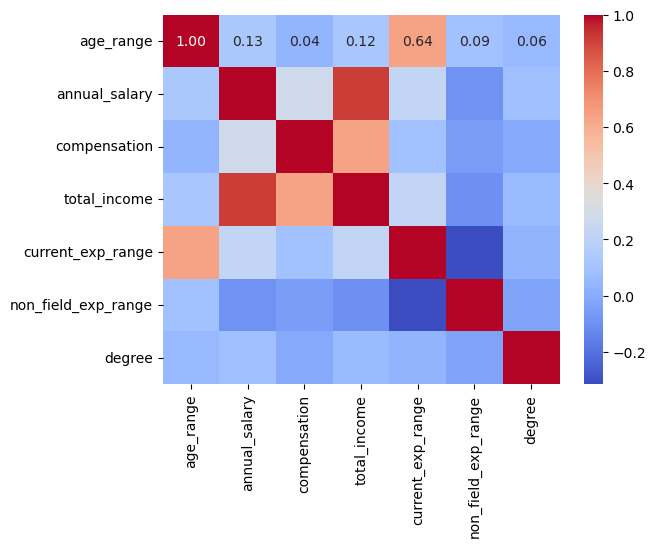

In [231]:
correlation_matrix = train_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

Menghapus 4 nilai yang outlier berdasrkan hasil analysis hubungan masing-masing independen variabel dengna total_income

In [232]:
value_outlier_detected = [5581, 26935, 18279, 5755]
new_train_df = train_df[~train_df.index.isin(value_outlier_detected)]

## Simple Linear Regression

In [233]:
X = train_df[['annual_salary']]  # Fitur (independen)
y = train_df['total_income']      # Target (dependen)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

n_samples = len(y_test)
SSE = n_samples * MSE

#LALALALLALLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL
RMSE = math.sqrt(MSE)

# Calculate R^2
n = len(y_test)
var_y = np.var(y_test)
R_squared = 1 - (SSE / (n * var_y))

# Number of predictors
k = X_test.shape[1]

# Calculate adjusted R^2
R_squared_adj = 1 - ((1 - R_squared) * (n - 1) / (n - k - 1))

print("R^2:", R_squared)
print("Adjusted R^2:", R_squared_adj)
print("Sum of Squared Errors (SSE):", SSE)
print("Mean Squared Error (MSE):", MSE)

R^2: 0.8145834483259659
Adjusted R^2: 0.814549705550411
Sum of Squared Errors (SSE): 6576314411214.432
Mean Squared Error (MSE): 1196346081.7199256


In [234]:
X = train_df[['compensation']]  # Fitur (independen)
y = train_df['total_income']      # Target (dependen)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

n_samples = len(y_test)
SSE = n_samples * MSE

print("Sum of Squared Errors (SSE):", SSE)
print("Mean Squared Error (MSE):", MSE)

Sum of Squared Errors (SSE): 20512924687110.598
Mean Squared Error (MSE): 3731658120.267527


In [235]:
df_encoded = train_df.copy()

# Dekode kembali kolom 'age_range'
encoder = LabelEncoder()
df_encoded['age_range'] = encoder.fit_transform(df_encoded['age_range'])

X = df_encoded[['age_range']]  # Fitur (independen)
y = df_encoded['total_income']  # Target (dependen)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

n_samples = len(y_test)
SSE = n_samples * MSE

#LALALALLALLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL
RMSE = math.sqrt(MSE)

# Calculate R^2
n = len(y_test)
var_y = np.var(y_test)
R_squared = 1 - (SSE / (n * var_y))

# Number of predictors
k = X_test.shape[1]

# Calculate adjusted R^2
R_squared_adj = 1 - ((1 - R_squared) * (n - 1) / (n - k - 1))

print("R^2:", R_squared)
print("Adjusted R^2:", R_squared_adj)

print("Sum of Squared Errors (SSE):", SSE)
print("Mean Squared Error (MSE):", MSE)

R^2: 0.017193913637450375
Adjusted R^2: 0.01701505902664735
Sum of Squared Errors (SSE): 34857955079101.0
Mean Squared Error (MSE): 6341268888.321084


## Multiple Linear Regression

In [236]:
# Lakukan one-hot encoding untuk variabel kategorikal
train_df_encoded = pd.get_dummies(train_df, columns=['age_range', 'current_exp_range', 'industry','degree','gender','race','country'])

X = train_df_encoded.drop(columns=['total_income'])
y = train_df_encoded['total_income']

#20% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

n_samples = len(y_test)
SSE = n_samples * MSE

print("Mean Squared Error (MSE):", MSE)
print("Sum of Squared Errors (SSE):", SSE)

Mean Squared Error (MSE): 1.1638411596217628e-19
Sum of Squared Errors (SSE): 6.397634854440831e-16


asumsi pada jenis multiple linear regression menghasilkan SSE dan MSE lebih rendah karena variabel kategorikal saling mempengaruhi, yang dimana untuk membuat hasil prediksi yg lebih akurat memang memerlukan variabel-variabek independen tersebut, hal ini juga dibukti pada Chi Square bahwa variabel independen tersebut tidak sepenuhnya independen dan malah reject null hypotesis 

**Gunakan Datafram baru new_train_df yang setelah di remove 4 nilai outlier, dan menghasilkan MSE dan SSE lebih rendah**

In [237]:
# Lakukan one-hot encoding untuk variabel kategorikal
train_df_encoded = pd.get_dummies(new_train_df, columns=['age_range', 'current_exp_range', 'industry','degree','gender','race','country'])

X = train_df_encoded.drop(columns=['total_income'])
y = train_df_encoded['total_income']

#20% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

n_samples = len(y_test)
SSE = n_samples * MSE

RMSE = math.sqrt(MSE)

# Calculate R^2
n = len(y_test)
var_y = np.var(y_test)
R_squared = 1 - (SSE / (n * var_y))

# Number of predictors
k = X_test.shape[1]

# Calculate adjusted R^2
R_squared_adj = 1 - ((1 - R_squared) * (n - 1) / (n - k - 1))

print("R^2:", R_squared)
print("Adjusted R^2:", R_squared_adj)
print("RMSE:", RMSE)
print("Mean Squared Error (MSE):", MSE)
print("Sum of Squared Errors (SSE):", SSE)

R^2: 1.0
Adjusted R^2: 1.0
RMSE: 3.301308449962952e-10
Mean Squared Error (MSE): 1.0898637481796788e-19
Sum of Squared Errors (SSE): 5.989891159995515e-16
